##### Imports

In [ ]:
import os
# import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# import itertools
import pickle
import datetime

from astropy.io import fits

from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline
# from scipy.linalg import lstsq
from scipy.signal import find_peaks
from scipy.ndimage import median_filter, minimum_filter, maximum_filter, gaussian_filter1d

# from sklearn.preprocessing import PolynomialFeatures, RobustScaler, MinMaxScaler
# from sklearn.linear_model import Ridge
# from sklearn.pipeline import make_pipeline, Pipeline
# from sklearn.linear_model import RANSACRegressor


In [2]:
import warnings
from scipy.linalg import LinAlgWarning
warnings.filterwarnings("ignore", category=LinAlgWarning)

In [3]:
from simple_veloce_reduction import veloce_reduction_tools
from simple_veloce_reduction import veloce_config
from simple_veloce_reduction import veloce_wavecalib
from simple_veloce_reduction import veloce_logs
from simple_veloce_reduction import veloce_diagnostic

In [4]:
from astropy.constants import c
c = c.value  # Speed of light in m/s
c

299792458.0

In [5]:
# %pip install -U scikit-learn

# LC trace extraction

In [5]:
run = 'CSV_Run'
date = '230826'
arm = 'green'
ccd = 'ccd_2'
amplifier_mode = 4
# run = '23xmasRun'
# run = 'Delta_Call_2025_accretion'
input_dir = f'/home/usqobserver2/VeloceData/{run}/'
output_dir = '/home/usqobserver2/Joachim_veloce/Extracted_data/LC/'
science_targets = ['HD20203-USQ01']

In [6]:
veloce_paths = veloce_config.VelocePaths(input_dir=input_dir, output_dir=output_dir)
obs_list = veloce_logs.load_night_logs(date, science_targets, arm, veloce_paths=veloce_paths)

In [ ]:
# arm = 'red'
# filename = os.path.join(veloce_paths.trace_dir, f'veloce_{arm}_4amp_sim_calib_trace.pkl')
# traces = veloce_reduction_tools.Traces.load_traces(filename)

In [ ]:
ORDER, COEFFS, MATCH_LAM, MATCH_PIX, MATCH_LRES, GUESS_LAM, Y0 = veloce_reduction_tools.load_prefitted_wave(arm=arm, wave_path=veloce_paths.wave_dir)
traces = veloce_reduction_tools.Traces.load_traces(os.path.join(veloce_paths.trace_dir, f'veloce_{arm}_4amp_sim_calib_trace.pkl'))

In [8]:
### apply this pre-made wavelength solution to ThAr calibrations and check quality

In [9]:
arm_n = {'blue':1, 'green':2, 'red':3}

In [ ]:
# filename = f'26aug{arm_n[arm]}0083.fits' # LC
# filename = f'24aug{arm_n[arm]}0085.fits' # LC
# filename = f'24aug{arm_n[arm]}0232.fits' # LC
# filename = f'23dec{arm_n[arm]}0110.fits' # LC
filename = f'06apr{arm_n[arm]}0129.fits' # LC
# filename = '24aug30310.fits' # ThAr lamp
# spectrum_filename =  os.path.join(veloce_paths.input_dir, '230824', f'ccd_{arm_n[arm]}', filename)
# spectrum_filename =  os.path.join(veloce_paths.input_dir, '231223', f'ccd_{arm_n[arm]}', filename)
spectrum_filename =  os.path.join(veloce_paths.input_dir, '250406', f'ccd_{arm_n[arm]}', filename)

with fits.open(spectrum_filename) as hdul:
    image_data = hdul[0].data
    header = hdul[0].header

# plt.imshow(image_data, cmap='gray', norm="log")
image_substracted_bias = veloce_reduction_tools.remove_overscan_bias(image_data, hdr=header, arm=arm, amplifier_mode=2, overscan_range=32)

# plt.imshow(image_substracted_bias, cmap='gray', norm="log")
# extracted_ThAr_orders = veloce_reduction_tools.extract_orders_with_trace(image_substracted_bias, traces, summing_ranges)

Gain for half 1: 1.01
Gain for half 2: 0.97364


In [450]:
image_substracted_bias.shape

(4112, 4096)

In [419]:
# %matplotlib widget

In [420]:
# frame = image_substracted_bias.copy()
# ylen, xlen = frame.shape
# plt.imshow(frame, cmap='gray', norm='log', aspect='equal')
# # y = np.arange(ylen)

# for trace_y, trace_x, lower, upper in traces:
#     plt.plot(trace_x+32,trace_y, c='r')
#     plt.plot(trace_x,trace_y, c='b')
#     # plt.plot(trace_x+upper+30,trace_y, ls=':', c='g')
#     # plt.plot(trace_x-lower+30,trace_y, ls='--', c='g')
# plt.xlim(0,xlen)

In [421]:

# plt.plot(extracted_ThAr_orders[6])
# plt.show()

In [422]:
# n = 1

# # for match_pix in MATCH_PIX[n-1]: ### green part needs shift by one order issue with labeling? 
# for match_pix in MATCH_PIX[n]:
#     plt.axline([match_pix+Y0[n], 0], [match_pix+Y0[n], 1], c='g')

# plt.plot(extracted_ThAr_orders[n])
# # plt.xlim(MATCH_PIX[n-1][0]-25+Y0[n],MATCH_PIX[n-1][0]+25+Y0[n])
# plt.xlim(MATCH_PIX[n][2]-25+Y0[n],MATCH_PIX[n][2]+25+Y0[n])
# # plt.xlim(2350,2400)
# plt.ylim(1000,3000)
# plt.xlabel('pix')
# plt.show()

In [423]:
# plt.close('all')

In [424]:
# for x in traces.x:
#     if np.any(np.isnan(x)):
#         print('nan')

In [462]:
traces = veloce_reduction_tools.Traces.load_traces(os.path.join(veloce_paths.trace_dir, f'veloce_{arm}_LC_trace.pkl'))

In [ ]:
traces.set_traces([(trace_y, trace_x+4) for trace_y, trace_x, _, _ in traces])

In [ ]:
traces.adjust_traces(image_substracted_bias, fit_width=7)

In [ ]:
# traces.set_summing_range([(5,5) for _ in traces.x])

In [ ]:
# filename_LC = f'veloce_{arm}_LC_trace'

In [ ]:
# traces.save_traces(filename_LC)

(1900.0, 2000.0)

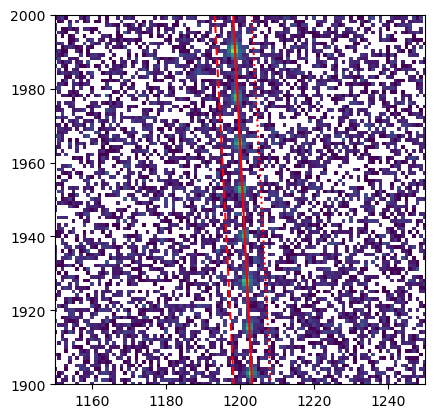

In [464]:
frame = image_substracted_bias.copy()
ylen, xlen = frame.shape
plt.imshow(frame, norm='log', aspect='equal')
# y = np.arange(ylen)

for trace_y, trace_x, lower, upper in traces:
    plt.plot(trace_x,trace_y, c='r')
    plt.plot(trace_x+upper,trace_y, ls=':', c='r')
    plt.plot(trace_x-lower,trace_y, ls='--', c='r')
# plt.xlim(0,xlen)
plt.xlim(1150,1250)
plt.ylim(1900, 2000)
# plt.xlim(1300,1400)
# plt.ylim(1900, 2000)


In [ ]:
# plt.close('all')

In [465]:
extracted_LC, extracted_LC_imgs = veloce_reduction_tools.extract_orders_with_trace(image_substracted_bias, traces)

In [466]:
wave = veloce_reduction_tools.calibrate_orders_to_wave(extracted_LC, Y0, COEFFS, traces=traces)

In [467]:
# filename = os.path.join(veloce_paths.output_dir, f'veloce_{arm}_LC_24aug{arm_n[arm]}0232.fits')
save_filename = os.path.join(veloce_paths.output_dir, f'veloce_{arm}_LC_{filename}')

print(f'Saving {save_filename}')
veloce_reduction_tools.save_extracted_spectrum_fits(save_filename, wave, extracted_LC, header)

Saving /home/usqobserver2/Joachim_veloce/Extracted_data/LC/Delta_Call_2025_accretion/veloce_red_LC_06apr30129.fits


'/home/usqobserver2/Joachim_veloce/Extracted_data/LC/Delta_Call_2025_accretion/veloce_red_LC_06apr30129.fits'

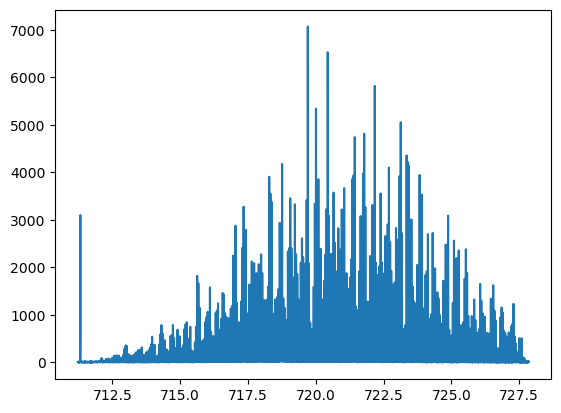

In [468]:
plt.plot(wave[20], extracted_LC[20])
# plt.xlim(720, 722.5)
# plt.xlim(720, 722.5)

In [ ]:
plt.close('all')

In [ ]:
# extracted_filename = '/home/usqobserver2/Joachim_veloce/Extracted_data/LC/veloce_red_LC_23dec30110.fits'
extracted_filename = '/home/usqobserver2/Joachim_veloce/Extracted_data/LC/Delta_Call_2025_accretion/veloce_red_LC_24aug30232.fits'
wave, extracted_LC, header = veloce_reduction_tools.load_extracted_spectrum_fits(extracted_filename)

In [11]:
wave_calib_data = veloce_wavecalib.load_LC_wave_calibration(veloce_paths, arm, header)

In [ ]:
wave_calib_data = np.array(
    list(zip(*wave_calib_data.T)),
    dtype=[('wave', float), ('flux', float), ('pixel', float), ('order', int)])

In [ ]:
unique_orders = list(set(wave_calib_data['order']))
# unique_orders

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

In [ ]:
# unique_orders = order_positions
for order in unique_orders:
    order_mask = wave_calib_data['order'] == order
    wave_calib_data['wave'][order_mask], wave_calib_data['flux'][order_mask], wave_calib_data['pixel'][order_mask]

In [27]:
i=0
for row in wave_calib_data:
    print(row)
    i+=1
    if i>10: break

[933.65922   16.831683 500.         1.      ]
[933.66592   23.762376 501.         1.      ]
[933.67262   28.712871 502.         1.      ]
[933.67932 207.92079 503.        1.     ]
[9.3368602e+02 2.9990099e+03 5.0400000e+02 1.0000000e+00]
[933.69272 466.33663 505.        1.     ]
[933.69942   59.405941 506.         1.      ]
[933.70611   31.683168 507.         1.      ]
[933.71281   23.762376 508.         1.      ]
[933.7195    20.792079 509.         1.      ]
[933.7262    11.881188 510.         1.      ]


In [29]:
for wave, intensity, pixel, order_num in zip(wave_calib_data[:,0], wave_calib_data[:,1], wave_calib_data[:,2], wave_calib_data[:,3]):
    print(tuple([wave, intensity, pixel, order_num]))
    break

(933.65922, 16.831683, 500.0, 1.0)


In [13]:
wave_calib_data[:,3]

array([ 1.,  1.,  1., ..., 40., 40., 40.])

In [18]:
order = 40
wave_calib_data[np.where(wave_calib_data[:,3] == order)]

array([[5.8330074e+02, 2.9702970e+00, 5.0000000e+02, 4.0000000e+01],
       [5.8330507e+02, 1.5841584e+01, 5.0100000e+02, 4.0000000e+01],
       [5.8330941e+02, 1.2871287e+01, 5.0200000e+02, 4.0000000e+01],
       ...,
       [5.9447678e+02, 1.8811881e+01, 3.8980000e+03, 4.0000000e+01],
       [5.9447912e+02, 9.9009901e+00, 3.8990000e+03, 4.0000000e+01],
       [5.9448146e+02, 1.5841584e+01, 3.9000000e+03, 4.0000000e+01]])

# Th arc lamp Calibration

##### Functions

In [ ]:
# def append_column_to_recarray(array, column_name, column_data):
#     """
#     Append a new column to a structured numpy array.
    
#     Parameters:
#     - array: The original structured numpy array.
#     - column_name: The name of the new column to be added.
#     - column_data: The data for the new column.
    
#     Returns:
#     - A new structured numpy array with the additional column.
#     """
#     dtype = array.dtype.descr + [(column_name, column_data.dtype)]
#     new_array = np.empty(array.shape, dtype=dtype)
#     for name in array.dtype.names:
#         new_array[name] = array[name]
#     new_array[column_name] = column_data
#     return new_array

In [ ]:
# def load_NIST_linelist(file):
#     # types = np.array([str, str, float, float, float, float, float, str, float, float, str, str, str, str, str, str, int, int, str, str, str, str])
#     types = np.array(['<U2','<U1','f','f','f','<U16','<U16','<U16','f','f','<U16','<U16','<U4','<U16','<U16','<U4','uint','uint','<U16','<U16','<U16','<U4'])
#     with open(file, 'r') as f:
#         lines = f.readlines()
#         columns = np.array(lines[0].strip().split(',')[:-1], dtype=str) # get column names
#         columns = np.append(columns, 'intens_flag') # add intensity flag column
#         mask = np.ones_like(columns, dtype=bool)
#         data = []
#         for line in lines[1:]:
#             # values = line.strip().split(',')
#             if len(line.strip().split(',')[:-1]) == len(columns)-1:
#                 values = np.array([value[4:-3] if (value.startswith('"') and value.endswith('"')) else value for value in line.strip().split(',')[:-1]], dtype=str)
#                 # split intensity and flag to seperate columns
#                 intens_flag = ''.join(filter(lambda x: not x.isdigit(), values[4])) or '1' #flag for line with no intensity flag (clean ones?) will be set to 1
#                 values[4] = ''.join(filter(str.isdigit, values[4])) # leave only digits as intensity
#                 values = np.append(values, intens_flag) # append intensity flag to the end of the values
#                 if values[3] != '':
#                     data.append(values)
#                     mask *= np.array([value != '' for value in values]) # mask out columns with empty values best lines have all values anyway?
#                 else:
#                     print(f'Skipping line at {values[2]}') # dropping lines without uncertainty that passed the website filter? only six or so
#     # Drop empty columns
#     data = [tuple(row[mask]) for row in data]
#     columns = columns[mask]
#     types = types[mask]
#     dtype = [(col, t) for col, t in zip(columns, types)]
#     data = np.array(data, dtype=dtype)
    
#     return data

# def load_vald_linelist(file):
#     # types = np.array([str, str, float, float, float, float, float, str, float, float, str, str, str, str, str, str, int, int, str, str, str, str])
#     types = np.array(['<U4', 'f', 'f', 'f', 'f', 'f', 'f', 'f', '<U90'])
#     columns = np.array(['Elm_Ion', 'WL_air(nm)', 'Excit(eV)', 'log_gf', 'Rad.', 'Stark', 'Waals', 'Lande', 'References'], dtype=str)
#     with open(file, 'r') as f:
#         lines = f.readlines()
#         data = []
#         for line in lines:
#             if line.startswith('#') or not line.strip():
#                 continue
#             else:
#                 # values = line.strip().split(',')
#                 values = np.array([str(value).strip("'").strip() if (value.startswith("'") and value.endswith("'")) else value.strip() for value in line.strip().split(',')], dtype=str)
#                 # values = np.array([value.strip() for value in line.strip().split(',')], dtype=str)
#                 data.append(values)

#     # Drop empty columns
#     data = [tuple(row) for row in data]
#     dtype = [(col, t) for col, t in zip(columns, types)]
#     data = np.array(data, dtype=dtype)
#     return data

# def load_UVES_linelist(file):
#     # with field labels matching nist linelist
#     types = np.array(['f', 'f', 'f', '<U2', '<U3', '<U1'])
#     # columns = np.array(['wavenumber(cm-1)', 'air_wave(nm)', 'log_intens', 'Element', 'Ion', 'Reference'], dtype=str)
#     columns = np.array(['wavenumber(cm-1)', 'obs_wl_air(nm)', 'intens', 'element', 'ion', 'line_ref'], dtype=str)
#     dtype = [(col, t) for col, t in zip(columns, types)]
#     with open(file, 'r') as f:
#         lines = f.readlines()
#         data = []
#         for line in lines:
#             values = np.array([value.strip() for value in line.strip().split()], dtype=str)
#             data.append(values)

#     data = [tuple(row) for row in data]
#     dtype = [(col, t) for col, t in zip(columns, types)]
#     data = np.array(data, dtype=dtype)
#     # Convert vacuum to air wavelengths to meet label
#     # data['air_wave(nm)'] = veloce_reduction_tools.vacuum_to_air(data['air_wave(nm)'])/10
#     # data['obs_wl_air(nm)'] = veloce_reduction_tools.vacuum_to_air(data['obs_wl_air(nm)'])/10
#     data['obs_wl_air(nm)'] = data['obs_wl_air(nm)']/10
#     ### force all lines meet preset intensity threshold (which is designed for nist linelist)
#     data['intens'] = 200+10**data['intens']  # Convert intensity
#     ### or just from log intensity 
#     # data['intens'] = 10**data['intens']
#     # Add empty columns for compatibility with nist linelist
#     data = append_column_to_recarray(data, 'unc_obs_wl', np.zeros_like(data['obs_wl_air(nm)']))
#     data = append_column_to_recarray(data, 'intens_flag', np.array(['1' for _ in range(len(data['obs_wl_air(nm)']))], dtype=str))
#     return data

# def load_UVES_linelist(file):
#     types = np.array(['f', 'f', 'f', '<U2', '<U3', '<U1'])
#     columns = ['wavenumber', 'air_wave', 'log_intens', 'Element', 'Ion', 'Reference']
#     dtype = [(col, t) for col, t in zip(columns, types)]
#     # with open(file, 'r') as f:
#     #     lines = f.readlines()
#     #     data = []
#     #     for line in lines:
#     #         values = np.array([value.strip() for value in line.strip().split()], dtype=str)
#     #         data.append(values)
#     data = np.genfromtxt(file, dtype=dtype, delimiter=None, names=columns, encoding='utf-8', autostrip=True)
#     data['air_wave'] = data['air_wave'] / 10  # Convert vacuum to air wavelengths to meet label
#     # Drop empty columns
#     # data = [tuple(row) for row in data]
#     # dtype = [(col, t) for col, t in zip(columns, types)]
#     # data = np.array(data, dtype=dtype)
#     # Convert vacuum to air wavelengths to meet label
#     # data['air_wave(nm)'] = veloce_reduction_tools.vacuum_to_air(data['air_wave(nm)'])/10
#     return data

In [ ]:
# def load_lines_from_solution_in_manual(MATCH_LAM):
#     columns = np.array(['obs_wl_air(nm)', 'intens', 'element', 'intens_flag'])
#     types = np.array(['f', 'f', '<U2', '<U1'])
#     dtype = [(col, t) for col, t in zip(columns, types)]
#     data = []
#     for match_lam in MATCH_LAM:
#         for lam in match_lam:
#             data.append(tuple([lam, 1e3, 'Th', '1']))
#     data = np.array(data, dtype=dtype)
#     # remove duplicates
#     data = np.unique(data, axis=0)
#     # Convert vacuum to air wavelengths to meet label
#     data['obs_wl_air(nm)'] = veloce_reduction_tools.vacuum_to_air(data['obs_wl_air(nm)'])

#     return data

In [9]:
# def general_gaussian(x, A, mu, sigma, beta, baseline):
#     return A * np.exp(-np.abs(((x - mu)/(np.sqrt(2)*sigma)))**beta) + baseline

In [ ]:
# def normalise_thxe_order(y, nknots=30, plot=False):
#     x = np.arange(len(y))
#     smoothed = median_filter(minimum_filter(y, 100), size=500)
#     x_fit = np.linspace(x.min(), x.max(), nknots)
#     y_fit = np.interp(x_fit, x, smoothed)
#     y_fit[0] = np.nanmin(y[:100])
#     y_fit[-1] = np.nanmin(y[-100:])

#     # spline = make_interp_spline(x_fit, y_fit, k=3)
#     spline = make_interp_spline(x_fit, y_fit, k=3, bc_type=([(1, 0.0)], [(1, 0.0)]))
#     baseline = spline(x)
    
#     if plot:
#         plt.figure(figsize=(10, 6))
#         plt.plot(x, y, c='gray', label='Original', alpha=0.5)
#         plt.plot(x, smoothed, ls='--', c='k', label='Smoothed')
#         plt.scatter(x_fit, y_fit, s=10, c='k', label='Selected knots')
#         plt.plot(x, baseline, c='r', label='B-spline fit')
#         plt.xlabel('Pixel')
#         plt.ylabel('Flux')
#         plt.xlim(0, len(y))
#         plt.ylim(0, np.max(smoothed) * 1.05)
#         plt.legend()
#         plt.title('Normalisation of ThXe Order')
#         plt.show()

#     return y/baseline
    

In [11]:
# def get_lines_in_order(wave, linelist, elements=None, intensity_threshold=None, flag=None):
#     """
#     Get the lines in the order from the linelist.
#     Wavelengths in linelist should be in air.
#     """
#     # Build mask for wavelength range
#     mask = (linelist['obs_wl_air(nm)'] >= wave.min()) & (linelist['obs_wl_air(nm)'] <= wave.max())
#     # Optional: intensity threshold
#     if intensity_threshold is not None:
#         # Filter linelist by intensity threshold
#         if type(intensity_threshold) == int:
#             min_intensity = intensity_threshold
#             max_intensity = np.inf
#         elif len(intensity_threshold) == 2:
#             min_intensity, max_intensity = intensity_threshold
#         else:
#             raise ValueError("Intensity threshold should be a single value or a tuple of two values.")
#         mask &= (linelist['intens'] >= min_intensity) & (linelist['intens'] <= max_intensity)
#     # Optional: intensity flag
#     if flag is not None:
#         if isinstance(flag, str):
#             mask &= (linelist['intens_flag'] == flag)
#         elif isinstance(flag, list):
#             mask &= np.isin(linelist['intens_flag'], flag)
#         else:
#             raise ValueError("Flag should be a string or a list of strings.")
#     # Optional: element condition
#     if elements is not None:
#         mask &= np.isin(linelist['element'], elements)
#     print(f"Found {np.sum(mask)} lines in the order.")
#     return linelist[mask]

In [12]:
# def fit_surface_custom(dispersion_position, orders_position, wave_array, extracted_pixels, degree=3, sigma_clip=3.0):
#     """
#     Fit a surface to the offset map using least squares.
#     Generalized to 2D polynomial with dependent degree in x and y.
#     """

#     # Prepare data: z = wave_array * orders_position
#     data = np.array([(x, y, z) for x, y, z in zip(dispersion_position, orders_position, wave_array * orders_position)])

#     # Generate all monomial powers for 2D polynomial up to degree_x and degree_y
#     def monomial_powers_2d(degree):
#         return [(i, j) for i in range(degree + 1) for j in range(degree - i + 1)]

#     powers = monomial_powers_2d(degree)
#     print(f"Using polynomial powers: {powers}")

#     # Build design matrix
#     def build_design_matrix(x, y, powers):
#         return np.stack([x**i * y**j for i, j in powers], axis=-1)

#     # Sigma clipping fit
#     max_iterations = 1000
#     mask = ~np.isnan(data[:, 2])
#     for iteration in range(max_iterations):
#         A = build_design_matrix(data[mask, 0], data[mask, 1], powers)
#         C, _, _, _ = lstsq(A, data[mask, 2])
#         residuals = data[:, 2] - build_design_matrix(data[:, 0], data[:, 1], powers) @ C
#         std_dev = np.std(residuals[mask])
#         new_mask = np.abs(residuals) < sigma_clip * std_dev
#         if np.array_equal(mask, new_mask):
#             print(f"Converged after {iteration} iterations.")
#             break
#         mask = new_mask
#     print(iteration)
#     print(C)

#     # Evaluate surface on grid
#     grid_points = np.vstack([(pixel, abs_order) for i, abs_order in enumerate(np.unique(orders_position)) for pixel in extracted_pixels[i]])
#     Z = build_design_matrix(grid_points[:, 0], grid_points[:, 1], powers) @ C
#     print(f"Fitted surface shape: {Z.shape}, {build_design_matrix(grid_points[:, 0], grid_points[:, 1], powers).shape}, {C.shape}")
#     Z = Z.reshape(len(extracted_pixels), -1)

#     return Z, C, data, residuals, mask


In [13]:
# from numpy.polynomial.chebyshev import chebvander2d
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.utils.validation import check_array

# class ChebyshevFeatures(BaseEstimator, TransformerMixin):
#     def __init__(self, deg_x=3, deg_y=3):
#         self.deg_x = deg_x
#         self.deg_y = deg_y

#     def fit(self, X, y=None):
#         X = check_array(X)
#         if X.shape[1] != 2:
#             raise ValueError("Input must have exactly two columns: x and y.")
#         return self
    
#     def transform(self, X):
#         X = check_array(X)
#         x, y = X[:, 0], X[:, 1]
#         return chebvander2d(x, y, [self.deg_x, self.deg_y])

In [14]:
# def fit_surface_sklearn(dispersion_position, orders_position, wave_array, extracted_pixels, degree=5, sigma_clip=2, robust=False, n_limit=0, seed=None):
#     """
#     Fit a bivariate polynomial surface to the wavelength solution using RANSAC for outlier rejection.
#     Returns fitted surface, residuals, and inlier mask.
#     """
    
#     # Prepare data
#     x = dispersion_position
#     y = orders_position
#     y_fit = wave_array * orders_position
#     # y_fit = wave_array

#     grid_points = np.vstack([(pixel, abs_order) for i, abs_order in enumerate(np.unique(orders_position)) for pixel in extracted_pixels[i]])

#     # Use scikit-learn PolynomialFeatures + Ridge for surface fitting
#     X = np.column_stack([x, y])
    
#     poly = PolynomialFeatures(degree=degree, include_bias=True)
#     ridge = Ridge(alpha=1.0, fit_intercept=True)
#     model = make_pipeline(poly, ridge)
#     # model = Pipeline([
#     #     # ('scaler', MinMaxScaler(feature_range=(0,1000))),  # scale input
#     #     # ('poly', PolynomialFeatures(degree=degree, include_bias=True)),
#     #     ('poly', PolyXY2dFeatures(degree_x=degree_x, degree_y=degree_y)),
#     #     ('ridge', Ridge(alpha=1.0, fit_intercept=True))  # Higher regularization for smoothness
#     # ])
    
#     model.fit(X, y_fit)
#     residuals = y_fit - model.predict(X)
#     # print(np.std(residuals))
#     init_residuals_std = np.std(residuals)
#     all_idx = np.arange(len(y_fit))
    
#     max_iterations = 1000
#     mask = residuals < sigma_clip * np.std(residuals)

#     # n_limit = degree + 2
#     converged = False
#     for iteration in range(max_iterations):
#         model.fit(X[mask], y_fit[mask])
#         # fit_idx = all_idx[mask]
#         residuals = y_fit - model.predict(X)
        
#         std_dev = np.std(residuals[mask])
#         # print(std_dev/np.sum(mask))
#         # print(np.std(residuals), np.mean(y_fit), np.mean(model.predict(X)))
#         new_mask = np.abs(residuals) < sigma_clip * std_dev
#         if n_limit > 0: # validate n points per order:
#             final_idx = []
#             for order in np.unique(orders_position):
#                 in_order = np.array(orders_position==order, dtype=bool)
#                 if np.sum(new_mask * in_order) > n_limit:
#                     final_idx.extend(all_idx[new_mask * in_order])
#                 elif np.sum(in_order) < n_limit:
#                     # print(f"[Warning]: not enough points in order {order} for ({degree_x}, {degree_y}) degree polynomial, this order might be poorly conditioned.")
#                     print(f"[Warning]: not enough points in order {order} for {degree} degree polynomial, this order might be poorly conditioned.")
#                     final_idx.extend(all_idx[in_order])
#                 else:
#                     # pick best residuals for the order
#                     sorted_order_idx = np.argsort(np.abs(residuals[in_order]))
#                     final_idx.extend(all_idx[in_order][sorted_order_idx[:n_limit]]) # use n_limit indexes of best residuals
#             final_idx = np.array(sorted(final_idx))
#             new_mask[final_idx] = True
#         if np.array_equal(mask, new_mask):
#             print(f"Converged.")
#             converged = True
#             break
#         mask = new_mask
#     print(f"Std of residuals dropped from {init_residuals_std:.3f} to {std_dev:.3f} after {iteration} iterations.")

#     if robust and (n_limit <= 0):
#         # Use RANSAC for robust fitting on the final mask
#         if seed is None:
#             ransac = RANSACRegressor(model, min_samples=0.5, residual_threshold=sigma_clip*std_dev)
#         else:
#             ransac = RANSACRegressor(model, min_samples=0.5, residual_threshold=sigma_clip*std_dev, random_state=seed)
#         ransac.fit(X, y_fit)
#         inlier_mask = ransac.inlier_mask_

#         # compare inlier mask with the previous mask
#         print(f"RANSAC inliers: {np.sum(inlier_mask)} vs iterative outlier rejection {np.sum(mask)}")
#         if not np.array_equal(mask, inlier_mask):
#             print("Warning: Inlier mask from RANSAC does not match the previous mask. This may indicate that RANSAC found a different set of inliers.")
        
#         # Predict on grid
#         Z = ransac.predict(grid_points).reshape(extracted_pixels.shape)
#         residuals = y_fit - ransac.predict(X)
#         mask = inlier_mask
#         model = ransac
#     else:
#         if robust:
#             print("[Warning]: Robust fitting with RANSAC regressor not used. It doesn't support minimum points per order (n_limit).")
#             print("Defaulted to iterative rejection.")
#         Z = model.predict(grid_points).reshape(extracted_pixels.shape)
#         residuals = y_fit - model.predict(X)

#     return Z, residuals, mask, model, converged

In [ ]:
# def fit_surface_sklearn(dispersion_position, orders_position, wave_array, extracted_pixels, degree=5, sigma_clip=2, robust=False, n_limit=0, seed=None):
#     """
#     Fit a bivariate polynomial surface to the wavelength solution using RANSAC for outlier rejection.
#     Returns fitted surface, residuals, and inlier mask.
#     """
    
#     # Prepare data
#     x = dispersion_position
#     y = orders_position
#     y_fit = wave_array * orders_position

#     grid_points = np.vstack([(pixel, abs_order) for i, abs_order in enumerate(np.unique(orders_position)) for pixel in extracted_pixels[i]])

#     # Use scikit-learn PolynomialFeatures + Ridge for surface fitting
#     X = np.column_stack([x, y])
    
#     poly = PolynomialFeatures(degree=degree, include_bias=True)
#     ridge = Ridge(alpha=1.0, fit_intercept=True)
#     model = make_pipeline(poly, ridge)
    
#     model.fit(X, y_fit)
#     residuals = y_fit - model.predict(X)
#     init_residuals_std = np.std(residuals)
#     all_idx = np.arange(len(y_fit))
    
#     max_iterations = 1000
#     mask = residuals < sigma_clip * np.std(residuals)
#     converged = False
    
#     # Iterative sigma clipping with n_limit constraint
#     for iteration in range(max_iterations):
#         model.fit(X[mask], y_fit[mask])
#         residuals = y_fit - model.predict(X)
        
#         std_dev = np.std(residuals[mask])
#         new_mask = np.abs(residuals) < sigma_clip * std_dev
        
#         if n_limit > 0: # validate n points per order:
#             final_idx = []
#             for order in np.unique(orders_position):
#                 in_order = np.array(orders_position==order, dtype=bool)
#                 if np.sum(new_mask * in_order) >= n_limit:
#                     final_idx.extend(all_idx[new_mask * in_order])
#                 elif np.sum(in_order) < n_limit:
#                     print(f"[Warning]: not enough points in order {order} for {degree} degree polynomial, this order might be poorly conditioned.")
#                     final_idx.extend(all_idx[in_order])
#                 else:
#                     # pick best residuals for the order
#                     sorted_order_idx = np.argsort(np.abs(residuals[in_order]))
#                     final_idx.extend(all_idx[in_order][sorted_order_idx[:n_limit]]) # use n_limit indexes of best residuals
#             final_idx = np.array(sorted(final_idx))
#             new_mask = np.zeros_like(mask, dtype=bool)
#             new_mask[final_idx] = True
            
#         if np.array_equal(mask, new_mask):
#             print(f"Converged.")
#             converged = True
#             break
#         mask = new_mask
        
#     print(f"Std of residuals dropped from {init_residuals_std:.3f} to {std_dev:.3f} after {iteration} iterations.")

#     if robust:
#         if n_limit <= 0:
#             # Standard RANSAC without n_limit constraint
#             if seed is None:
#                 ransac = RANSACRegressor(model, min_samples=0.5, residual_threshold=sigma_clip*std_dev)
#             else:
#                 ransac = RANSACRegressor(model, min_samples=0.5, residual_threshold=sigma_clip*std_dev, random_state=seed)
#             ransac.fit(X, y_fit)
#             inlier_mask = ransac.inlier_mask_

#             print(f"RANSAC inliers: {np.sum(inlier_mask)} vs iterative outlier rejection {np.sum(mask)}")
#             if not np.array_equal(mask, inlier_mask):
#                 print("Warning: Inlier mask from RANSAC does not match the previous mask. This may indicate that RANSAC found a different set of inliers.")
            
#             Z = ransac.predict(grid_points).reshape(extracted_pixels.shape)
#             residuals = y_fit - ransac.predict(X)
#             mask = inlier_mask
#             model = ransac
#         else:
#             # RANSAC with n_limit constraint - need to validate and fix the mask
#             if seed is None:
#                 ransac = RANSACRegressor(model, min_samples=0.5, residual_threshold=sigma_clip*std_dev)
#             else:
#                 ransac = RANSACRegressor(model, min_samples=0.5, residual_threshold=sigma_clip*std_dev, random_state=seed)
#             ransac.fit(X, y_fit)
#             ransac_mask = ransac.inlier_mask_
            
#             # Apply n_limit constraint to RANSAC results
#             constrained_mask = apply_n_limit_constraint(
#                 ransac_mask, orders_position, y_fit, X, model, n_limit, all_idx, residuals
#             )
            
#             print(f"RANSAC inliers: {np.sum(ransac_mask)} -> constrained: {np.sum(constrained_mask)} vs iterative: {np.sum(mask)}")
            
#             # Refit with constrained mask
#             model.fit(X[constrained_mask], y_fit[constrained_mask])
#             Z = model.predict(grid_points).reshape(extracted_pixels.shape)
#             residuals = y_fit - model.predict(X)
#             mask = constrained_mask
#     else:
#         Z = model.predict(grid_points).reshape(extracted_pixels.shape)
#         residuals = y_fit - model.predict(X)

#     return Z, residuals, mask, model, converged

# def apply_n_limit_constraint(initial_mask, orders_position, y_fit, X, model, n_limit, all_idx, residuals):
#     """
#     Apply n_limit constraint to any mask, ensuring minimum points per order.
#     """
#     constrained_mask = np.zeros_like(initial_mask, dtype=bool)
    
#     # Get residuals for current model
#     current_residuals = y_fit - model.predict(X)
    
#     for order in np.unique(orders_position):
#         in_order = np.array(orders_position == order, dtype=bool)
#         order_mask = initial_mask & in_order
        
#         if np.sum(order_mask) >= n_limit:
#             # Enough points selected by RANSAC for this order
#             constrained_mask[order_mask] = True
#         elif np.sum(in_order) < n_limit:
#             # Not enough total points in order
#             print(f"[Warning]: Order {order} has fewer than {n_limit} total points.")
#             constrained_mask[in_order] = True
#         else:
#             # Need to select best n_limit points for this order
#             order_residuals = np.abs(current_residuals[in_order])
#             order_indices = all_idx[in_order]
#             sorted_indices = order_indices[np.argsort(order_residuals)]
#             best_indices = sorted_indices[:n_limit]
#             constrained_mask[best_indices] = True
            
#     return constrained_mask

In [16]:
# def fit_chebyshev_sklearn(dispersion_position, orders_position, wave_array, extracted_pixels, degree_x=3, degree_y=3, sigma_clip=2, robust=False, n_limit=0, seed=None):
#     """
#     Fit a bivariate polynomial surface to the wavelength solution using RANSAC for outlier rejection.
#     Returns fitted surface, residuals, and inlier mask.
#     """
    
#     # Prepare data
#     x = dispersion_position
#     y = orders_position
#     y_fit = wave_array * orders_position
#     # y_fit = wave_array

#     grid_points = np.vstack([(pixel, abs_order) for i, abs_order in enumerate(np.unique(orders_position)) for pixel in extracted_pixels[i]])

#     # Use scikit-learn PolynomialFeatures + Ridge for surface fitting
#     X = np.column_stack([x, y])
#     # scaler = MinMaxScaler(feature_range=(-1,1))
#     # X_scaled = scaler.fit_transform(X)
#     # X_poly = chebvander2d(X_scaled[:,0], X_scaled[:,1], [degree, degree])
#     # Create pipeline with robust preprocessing
#     model = Pipeline([
#         ('scaler', MinMaxScaler(feature_range=(-1,1))),  # fit chebyshev definition
#         # ('poly', PolynomialFeatures(degree=degree, include_bias=True)),
#         ('poly', ChebyshevFeatures(deg_x=degree_x, deg_y=degree_y)),
#         ('ridge', Ridge(alpha=1.0, fit_intercept=True))  # Higher regularization for smoothness
#     ])
    
#     # poly = PolynomialFeatures(degree=degree)
#     # ridge = Ridge(alpha=1.0, fit_intercept=True)
#     # model = make_pipeline(poly, ridge)
    
#     model.fit(X, y_fit)
#     residuals = y_fit - model.predict(X)
#     print(np.mean(residuals), np.mean(y_fit), np.mean(model.predict(X)))
#     init_residuals_std = np.std(residuals)
#     all_idx = np.arange(len(y_fit))
    
#     max_iterations = 100
#     mask = residuals < sigma_clip * np.std(residuals)

#     # n_limit = degree + 2

#     for iteration in range(max_iterations):
#         model.fit(X[mask], y_fit[mask])
#         # fit_idx = all_idx[mask]
#         residuals = y_fit - model.predict(X)
#         std_dev = np.std(residuals[mask])
#         new_mask = np.abs(residuals) < sigma_clip * std_dev
#         if n_limit > 0: # validate n points per order:
#             final_idx = []
#             for order in np.unique(orders_position):
#                 in_order = np.array(orders_position==order, dtype=bool)
#                 if np.sum(new_mask * in_order) > n_limit:
#                     final_idx.extend(all_idx[new_mask * in_order])
#                 elif np.sum(in_order) < n_limit:
#                     final_idx.extend(all_idx[in_order])
#                 else:
#                     # pick best residuals for the order
#                     sorted_order_idx = np.argsort(np.abs(residuals[in_order]))
#                     final_idx.extend(all_idx[in_order][sorted_order_idx[:n_limit]]) # use n_limit indexes of best residuals
#             final_idx = np.array(sorted(final_idx))
#             new_mask[final_idx] = True
#         if np.array_equal(mask, new_mask):
#             print(f"Converged.")
#             break
#         mask = new_mask
#     print(f"Std of residuals droped from {init_residuals_std:.3f} to {std_dev:.3f} after {iteration} iterations.")

#     if robust and (n_limit <= 0):
#         # Use RANSAC for robust fitting on the final mask
#         if seed is None:
#             ransac = RANSACRegressor(model, min_samples=0.5, residual_threshold=sigma_clip*std_dev)
#         else:
#             ransac = RANSACRegressor(model, min_samples=0.5, residual_threshold=sigma_clip*std_dev, random_state=seed)
#         ransac.fit(X, y_fit)
#         inlier_mask = ransac.inlier_mask_

#         # compare inlier mask with the previous mask
#         print(f"RANSAC inliers: {np.sum(inlier_mask)} vs iterative outlier rejection {np.sum(mask)}")
#         if not np.array_equal(mask, inlier_mask):
#             print("Warning: Inlier mask from RANSAC does not match the previous mask. This may indicate that RANSAC found a different set of inliers.")
        
#         # Predict on grid
#         Z = ransac.predict(grid_points).reshape(extracted_pixels.shape)
#         residuals = y_fit - ransac.predict(X)
#         mask = inlier_mask
#         model = ransac
#     else:
#         if robust:
#             print("[Warning]: Robust fitting with RANSAC regressor not used. It doesn't support minimum points per order (n_limit).")
#             print("Defaulted to iterative rejection.")
#         Z = model.predict(grid_points).reshape(extracted_pixels.shape)
#         residuals = y_fit - model.predict(X)

#     return Z, residuals, mask, model

In [17]:
def fit_polynomial_per_order(pixel_positions, order_positions, wave_positions, degree=2, sigma_clip=3.0, max_iter=10):
    """
    Fit a polynomial of given degree for each order separately with outlier rejection.
    Returns a dict: {order: (numpy.poly1d object, coeff_uncertainties)}
    """
    unique_orders = np.unique(order_positions)
    polynomials = {}
    for order in unique_orders:
        mask = order_positions == order
        x = pixel_positions[mask]
        y = wave_positions[mask]
        inlier_mask = np.ones_like(x, dtype=bool)
        # print(len(x))
        for _ in range(max_iter):
            # coeffs, cov = np.polyfit(x[inlier_mask], y[inlier_mask], degree, cov=True)
            coeffs = np.polyfit(x[inlier_mask], y[inlier_mask], degree)
            y_fit = np.polyval(coeffs, x)
            residuals = y - y_fit
            std_dev = np.std(residuals[inlier_mask])
            new_mask = np.abs(residuals) < sigma_clip * std_dev
            if np.array_equal(inlier_mask, new_mask):
                break
            if np.sum(new_mask) < degree:
                Warning(f"Not enough points ({np.sum(new_mask)}/{len(new_mask)}) to fit {degree} order polynomial.")
                break
            inlier_mask = new_mask
        # uncertainties = np.sqrt(np.diag(cov))
        polynomials[order] = (np.poly1d(coeffs), residuals, inlier_mask)
    return polynomials

##### Load ARC ThXe calibration data

In [6]:
run = "CSV_Run"
# run = "WASP189b"
date = "230828"
# date = "240410"
# arm = 'red'
arm = 'green'
# arm = 'blue'
ccd_nums = {'red': 3, 'green': 2, 'blue': 1}
ccd = f'ccd_{ccd_nums[arm]}'
amplifier_mode = 4
# amplifier_mode = 2
# filename = '26aug20055.fits'
# filename = '26aug20061.fits'
science_targets = ['HD20203-USQ01']
# science_targets = ['WASP189b']

In [7]:
input_dir = f'/home/usqobserver2/VeloceData/{run}/'
# output_dir = '/home/usqobserver2/Joachim_veloce/Extracted_data/ThXe/'
output_dir = f'/home/usqobserver2/Joachim_veloce/Extracted_data/{run}/'

In [8]:
veloce_paths = veloce_config.VelocePaths(input_dir=input_dir, output_dir=output_dir)

In [9]:
obs_list = veloce_logs.load_night_logs(date, science_targets, arm, veloce_paths=veloce_paths)

In [10]:
# obs_list[f'ARC-ThAr_{arm}'][date]

In [11]:
# file_list = obs_list[f'ARC-ThAr_{arm}'][date][:-3]
# file_list = obs_list[f'ARC-ThAr_{arm}'][date][:9]
# file_list

In [12]:
# data, header = veloce_reduction_tools.get_master_mmap(file_list, f'ARC-ThAr_{arm}', input_dir, date, arm, amplifier_mode)

In [10]:
# master_filename = f'Master/master_ARC-ThAr_{arm}_{date}.fits'
master_filename = f'{veloce_paths.master_dir}/master_ARC-ThAr_{arm}_{date}.fits'
# veloce_reduction_tools.save_image_fits(master_filename, data, header)
with fits.open(master_filename) as hdul:
    data= hdul[0].data
    header = hdul[0].header

In [11]:
traces = veloce_reduction_tools.Traces.load_traces(os.path.join(veloce_paths.trace_dir, f'veloce_{arm}_4amp_sim_calib_trace.pkl'))
# traces = veloce_reduction_tools.Traces.load_traces(os.path.join(veloce_paths.trace_dir, f'veloce_{arm}_4amp_no_sim_calib_trace.pkl'))

In [15]:
# plt.close('all')
# fig, axes = plt.subplots(1,1)
# # order=-11
# axes.imshow(data, origin='lower', norm='symlog')
# # axes[1].imshow(data_2, origin='lower', norm='symlog')
# # plt.plot(traces.x[order], traces.y[order], 'r--')
# plt.show()

In [12]:
extracted_ThXe, extracted_ThXe_imgs = veloce_reduction_tools.extract_orders_with_trace(data, traces)
# extracted_ThXe_2, extracted_ThXe_imgs = veloce_reduction_tools.extract_orders_with_trace(data_2, traces)

In [13]:
ORDER, COEFFS, MATCH_LAM, MATCH_PIX, MATCH_LRES, GUESS_LAM, Y0 = veloce_reduction_tools.load_prefitted_wave(arm=arm, wave_path=veloce_paths.wave_dir)

In [14]:
wave = veloce_reduction_tools.calibrate_orders_to_wave(extracted_ThXe, Y0, COEFFS, traces=traces)

##### All at once 

Loaded line list
 Notes: 350nm-950nm air, with uncertainties, only without intensity flags, relative intensity above 50 
 Cite as: 
 @Misc{NIST_ASD,
    author = {A.~Kramida and {Yu.~Ralchenko} and
    J.~Reader and {and NIST ASD Team}},
    HOWPUBLISHED = {{NIST Atomic Spectra Database
    (ver. 5.12), [Online]. Available:
    {	t{https://physics.nist.gov/asd}} [2025, July 22].
    National Institute of Standards and Technology,
    Gaithersburg, MD.}},
    year = {2024},
    }

Fitting lines in order 103 (1/38)
Using window size: 126
Detected 1738 peaks using signal method with window size 126
Detected 1738 peaks using signal method with window size 126
Total detected peaks: 1738
Max variance: 756168185.05, Variance penalty range: 0.00 - 1.00
Removing duplicate knots after placement.
Final nknot after moving knots and dropping close pairs: 14 out of 15
Found 78 lines in the order.
Peak height for line 586.985 nm is too low: 0.38.
Peak height for line 587.055 nm is too low: 0.93.
Peak

/home/usqobserver2/anaconda3/envs/reduce_spectro/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Fitting line 590.416 nm at pixel 823.21, peak height 4.31, floor 1.19
Fitting line 590.518 nm at pixel 848.34, peak height 80.90, floor 1.25
Fitting line 590.557 nm at pixel 858.10, peak height 8.86, floor 1.25
Fitting line 590.840 nm at pixel 928.68, peak height 1.37, floor 0.88
Fitting line 590.893 nm at pixel 941.79, peak height 10.28, floor 1.00
Fitting line 590.896 nm at pixel 942.60, peak height 10.28, floor 1.00
Fitting line 591.123 nm at pixel 999.94, peak height 3.37, floor 1.08
Fitting line 591.336 nm at pixel 1054.30, peak height 1.44, floor 0.85
Fitting line 591.439 nm at pixel 1080.51, peak height 22.20, floor 0.99
Fitting line 591.467 nm at pixel 1087.84, peak height 45.62, floor 0.99
Fitting line 591.471 nm at pixel 1088.94, peak height 45.62, floor 0.99
Fitting line 591.673 nm at pixel 1141.00, peak height 5.10, floor 1.01
Fitting line 591.894 nm at pixel 1198.77, peak height 5.04, floor 0.95
Fitting line 592.280 nm at pixel 1300.65, peak height 1.92, floor 1.08
Fitting

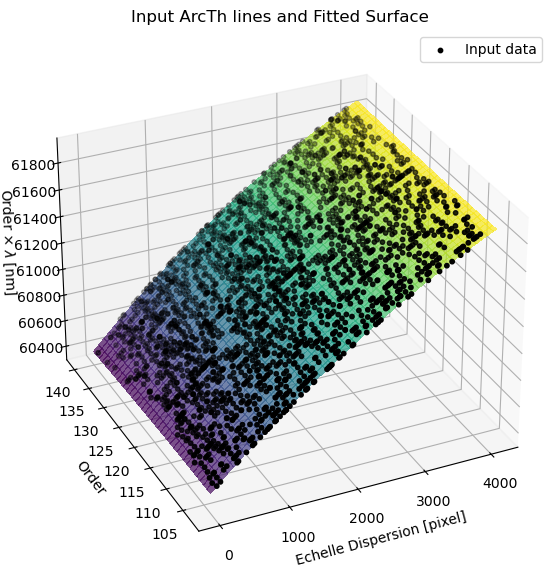

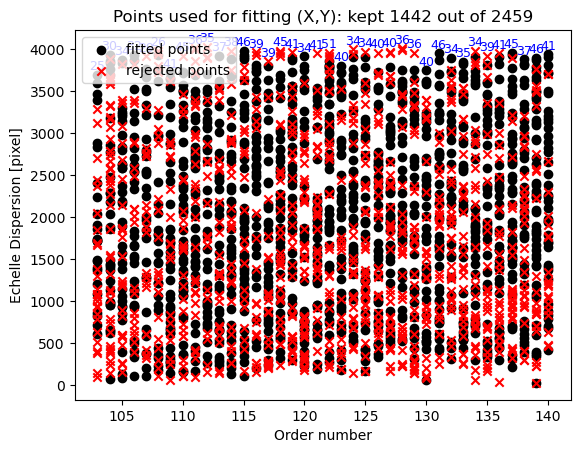

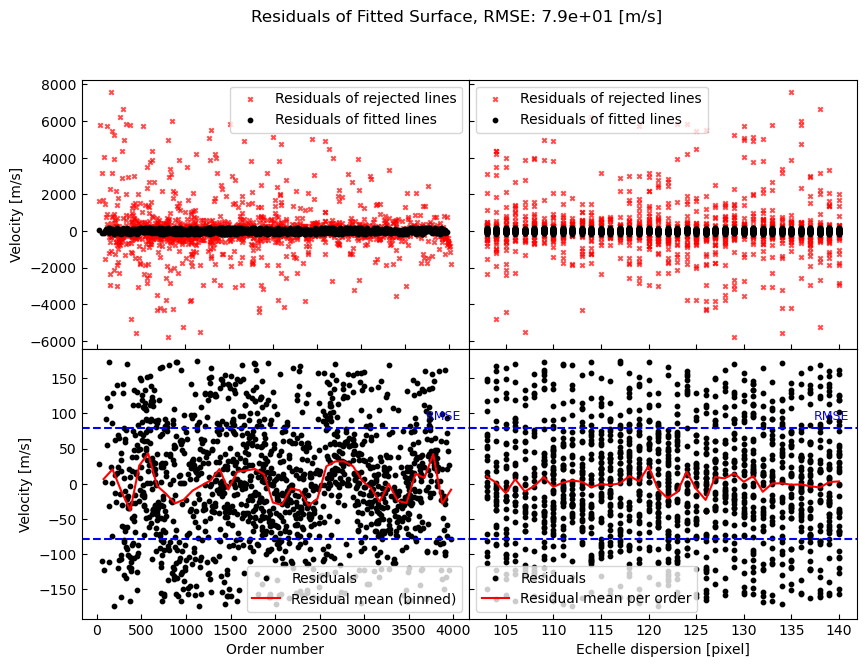

In [15]:
new_wave = veloce_wavecalib.calibrate_absolute_Th(traces, veloce_paths, obs_list,
                                                   date, arm, amplifier_mode,
                                                   plot=True, plot_filename='test',
                                                   th_linelist_filename='Default')

##### Load blaze

In [52]:
file_list = obs_list[f'flat_{arm}'][date][:15]


In [53]:
data, header = veloce_reduction_tools.get_master_mmap(file_list, f'flat_{arm}', input_dir, date, arm, amplifier_mode)

Gain for quadrant 1: 1.01
Gain for quadrant 2: 1.072216
Gain for quadrant 3: 1.0984080269999998
Gain for quadrant 4: 1.05141
Gain for quadrant 1: 1.01
Gain for quadrant 2: 1.072216
Gain for quadrant 3: 1.0984080269999998
Gain for quadrant 4: 1.05141
Gain for quadrant 1: 1.01
Gain for quadrant 2: 1.072216
Gain for quadrant 3: 1.0984080269999998
Gain for quadrant 4: 1.05141
Gain for quadrant 1: 1.01
Gain for quadrant 2: 1.072216
Gain for quadrant 3: 1.0984080269999998
Gain for quadrant 4: 1.05141
Gain for quadrant 1: 1.01
Gain for quadrant 2: 1.072216
Gain for quadrant 3: 1.0984080269999998
Gain for quadrant 4: 1.05141
Gain for quadrant 1: 1.01
Gain for quadrant 2: 1.072216
Gain for quadrant 3: 1.0984080269999998
Gain for quadrant 4: 1.05141
Gain for quadrant 1: 1.01
Gain for quadrant 2: 1.072216
Gain for quadrant 3: 1.0984080269999998
Gain for quadrant 4: 1.05141
Gain for quadrant 1: 1.01
Gain for quadrant 2: 1.072216
Gain for quadrant 3: 1.0984080269999998
Gain for quadrant 4: 1.05141


In [54]:
master_filename = f'{veloce_paths.master_dir}/master_fib_flat_{arm}_{date}.fits'
veloce_reduction_tools.save_image_fits(master_filename, data, header)
with fits.open(master_filename) as hdul:
    data= hdul[0].data
    header = hdul[0].header

In [60]:
blaze_traces = veloce_reduction_tools.Traces.load_traces(os.path.join(veloce_paths.trace_dir, f'veloce_{arm}_4amp_no_sim_calib_trace.pkl'))

In [61]:
blaze, _ = veloce_reduction_tools.extract_orders_with_trace(data, blaze_traces)

##### Load atomic data

In [32]:
# raw linelist processing
# nist_linelist = load_NIST_linelist('/home/usqobserver2/Joachim_veloce/veloce_reduction_dev/veloce_reduction/Wave/th_linelist_NIST.csv')

In [33]:
# cite = """@Misc{NIST_ASD,
#     author = {A.~Kramida and {Yu.~Ralchenko} and
#     J.~Reader and {and NIST ASD Team}},
#     HOWPUBLISHED = {{NIST Atomic Spectra Database
#     (ver. 5.12), [Online]. Available:
#     {\tt{https://physics.nist.gov/asd}} [2025, July 22].
#     National Institute of Standards and Technology,
#     Gaithersburg, MD.}},
#     year = {2024},
#     }"""
# notes = "350nm-950nm air, with uncertainties, only without intensity flags, relative intensity above 50"
# filtered_nist_linelist = nist_linelist[(nist_linelist['intens_flag']=='1') & (nist_linelist['intens']>50)]
# atomic_data = {'linelist': filtered_nist_linelist, 'cite': cite, 'notes': notes, date: datetime.datetime.now().date()}
# linelist_filename = './Wave/th_linelist_NIST.pickle'
# with open(linelist_filename, 'wb') as file:
#     pickle.dump(atomic_data, file)

In [19]:
nist_linelist = veloce_wavecalib.load_Th_linelist(veloce_paths, filename='Default', linelist_type='NIST')

Loaded line list
 Notes: 350nm-950nm air, with uncertainties, only without intensity flags, relative intensity above 50 
 Cite as: 
 @Misc{NIST_ASD,
    author = {A.~Kramida and {Yu.~Ralchenko} and
    J.~Reader and {and NIST ASD Team}},
    HOWPUBLISHED = {{NIST Atomic Spectra Database
    (ver. 5.12), [Online]. Available:
    {	t{https://physics.nist.gov/asd}} [2025, July 22].
    National Institute of Standards and Technology,
    Gaithersburg, MD.}},
    year = {2024},
    }



In [35]:
# def get_linelist_from_veloce_precomputed

In [36]:
# vald_linelist = load_vald_linelist('/home/usqobserver2/Joachim_veloce/veloce_reduction_dev/veloce_reduction/Wave/th_linelist_VALD.csv')

In [37]:
# uves_linelist = load_UVES_linelist('/home/usqobserver2/Joachim_veloce/veloce_reduction_dev/veloce_reduction/Wave/thar_UVES_MM090311.dat')

In [38]:
# manual_linelist = load_lines_from_solution_in_manual(MATCH_LAM)

### Fit Th lines

##### Plot seleced order with line positions

In [40]:
%matplotlib widget
# %matplotlib inline

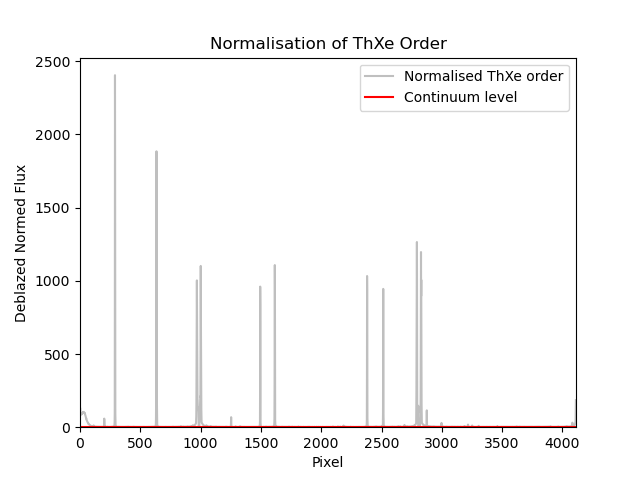

In [ ]:
# plt.close('all')
# order_blaze=fit_blaze_spline(blaze[order], nknots=100, plot=False)
# # order_blaze = order_blaze / np.nanmax(order_blaze)  # normalise blaze to 1
# deblazed_ThXe = extracted_ThXe[order] / order_blaze  # deblaze the ThXe order
# normalised_ThXe = deblazed_ThXe / np.percentile(deblazed_ThXe, 1)  # normalise to continuum at 1
# # normalised_ThXe = veloce_wavecalib.normalise_thxe_order(deblazed_ThXe, nknots=30, plot=True)
# plt.plot(normalised_ThXe, c='gray', alpha=0.5, label='Normalised ThXe order')
# plt.axhline(1, color='red', ls='-', label='Continuum level')
# plt.xlabel('Pixel')
# plt.ylabel('Deblazed Normed Flux')
# plt.xlim(0, len(normalised_ThXe))
# plt.ylim(0,)
# plt.legend()
# plt.title('Normalisation of ThXe Order')
# plt.show()

4112
0.0 4111.0 711.2195563592795 727.8540408293378
Found 88 lines in the order.


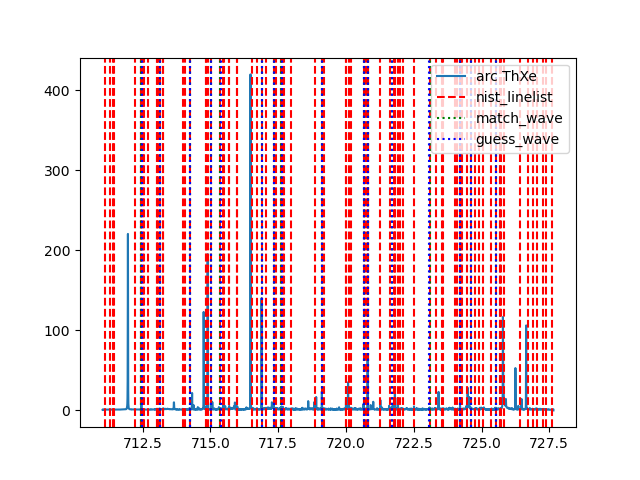

In [ ]:
# plt.close('all')
# order = 20
# # plt.plot(veloce_reduction_tools.vacuum_to_air(wave[order]), extracted_ThXe[order])
# # Smooth the data
# print(len(wave[order]))
# print(traces.y[order][0], traces.y[order][-1], wave[order][0], wave[order][-1])
# if arm == 'red':
#     # not normalising as very bright oversaturated lines mess with my normalisation
#     # plt.plot(veloce_reduction_tools.vacuum_to_air(wave[order]), extracted_ThXe[order], label='Data')
#     plt.plot(veloce_reduction_tools.vacuum_to_air(wave[order]), veloce_wavecalib.normalise_thxe_order(extracted_ThXe[order], nknots=50), label='arc ThXe')
# elif arm == 'green':
#     plt.plot(veloce_reduction_tools.vacuum_to_air(wave[order]), veloce_wavecalib.normalise_thxe_order(extracted_ThXe[order], nknots=50), label='arc ThXe')
# elif arm == 'blue':
#     plt.plot(veloce_reduction_tools.vacuum_to_air(wave[order]), veloce_wavecalib.normalise_thxe_order(extracted_ThXe[order], nknots=50), label='arc ThXe')
# else:
#     raise ValueError(f"Arm {arm} does not exist, valid arms are ['red', 'green' and 'blue'].")
    

# lines = veloce_wavecalib.get_lines_in_order(veloce_reduction_tools.vacuum_to_air(wave[order]), nist_linelist, intensity_threshold=100, flag=['1'])
# # lines = get_lines_in_order(veloce_reduction_tools.vacuum_to_air(wave[order]), nist_linelist, elements=['Th', 'Xe'], intensity_threshold=100)
# for line in lines:
#     plt.axvline(line['obs_wl_air(nm)'], c='r', ls='--', label="nist_linelist")

# # for line in uves_linelist[(uves_linelist['air_wave'] >= wave[20].min()) & (uves_linelist['air_wave'] <= wave[20].max())]:
# #     plt.axvline(line['air_wave'], c='orange', ls='--', label="uves_linelist")

# # for line in vald_linelist[(vald_linelist['WL_air(nm)'] >= wave[20].min()) & (vald_linelist['WL_air(nm)'] <= wave[20].max())]:
# #     plt.axvline(line['WL_air(nm)'], c='orange', ls='--', label="vald_linelist")

# for match_wave in MATCH_LAM[order]:
#     plt.axvline(veloce_reduction_tools.vacuum_to_air(match_wave), c='g', ls=':', label="match_wave")

# for guess_wave in GUESS_LAM[order]:
#     plt.axvline(veloce_reduction_tools.vacuum_to_air(guess_wave), c='b', ls=':', label="guess_wave")
# # Remove duplicate labels in legend
# handles, labels = plt.gca().get_legend_handles_labels()
# unique = dict()
# for h, l in zip(handles, labels):
#     if l not in unique:
#         unique[l] = h
# plt.legend(unique.values(), unique.keys())
# # plt.xlim(496.27, 496.34)
# plt.show()

In [27]:
%matplotlib widget

Using window size: 137
Detected 1921 peaks using signal method with window size 137
Detected 1921 peaks using signal method with window size 137
Total detected peaks: 1921
Max variance: 162655747995.76, Variance penalty range: 0.00 - 1.00
Final nknot after moving knots and dropping close pairs: 15 out of 15
Found 126 lines in the order.


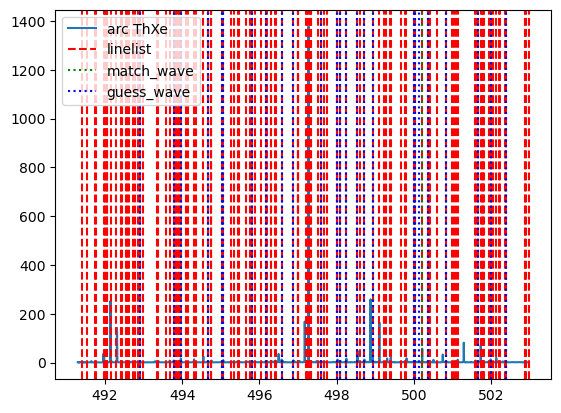

In [37]:
order = 20
veloce_wavecalib.plot_order_with_lines(
    veloce_reduction_tools.vacuum_to_air(wave[order]),
    veloce_wavecalib.normalise_thxe_order_with_spline(extracted_ThXe[order]),
    nist_linelist,
    original_solution=(MATCH_LAM[order], GUESS_LAM[order]))

##### Single order with plots

In [111]:
%matplotlib inline
plt.close('all')

In [ ]:
def plot_fail(x_fit, y_fit, line_pixel, line_wave, order, center=None):
    plt.plot(x_fit, y_fit, 'b-', label='Data')
    plt.axvline(line_pixel, c='orange', ls=':', label='Line guess')
    if center is not None:
        plt.axvline(center, c='green', ls=':', label='Closest peak')
    plt.title(f"Order {order}, Line {line_wave:.3f} nm")
    plt.xlim(x_fit.min(), x_fit.max())
    plt.ylim(y_fit.min()*0.9, y_fit.max()*1.1)
    plt.xlabel('Pixel')
    plt.ylabel('Flux')
    plt.legend()
    plt.show()

Found 21 lines in the order.
Peak height for line 930.001 nm is too low: 0.04.


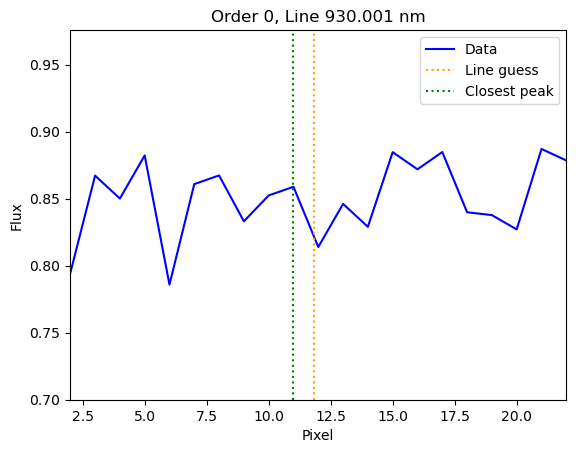

Fitting line 930.789 nm at pixel 122.35, peak height 0.56, floor 1.17


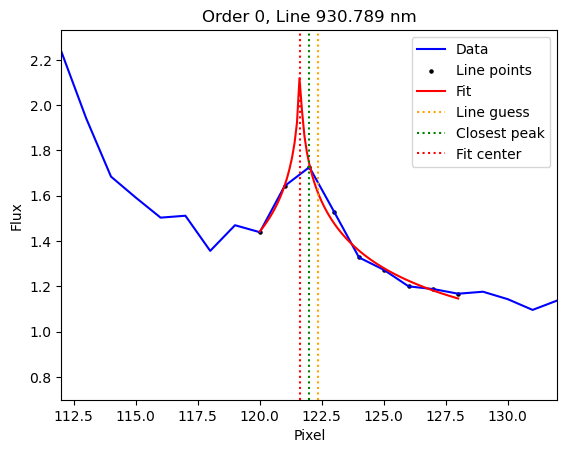

Fitting line 931.044 nm at pixel 158.47, peak height 0.38, floor 1.00


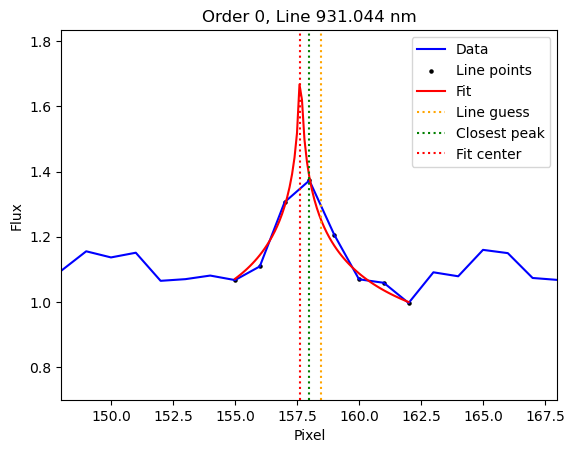

Fitting line 931.773 nm at pixel 262.73, peak height 1.32, floor 1.07


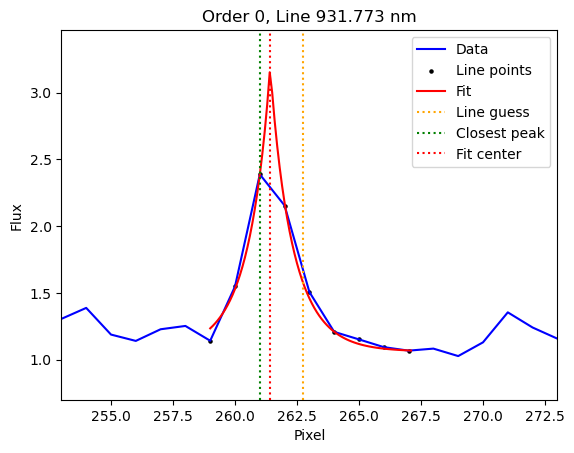

Peak height for line 932.007 nm is too low: 0.22.


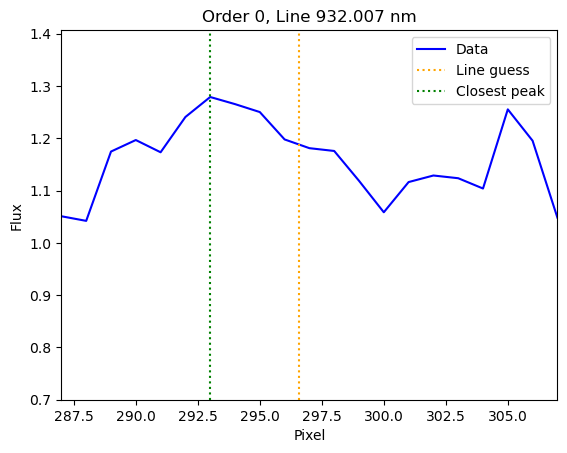

Line 933.616 nm is asymmetric - probably a blend


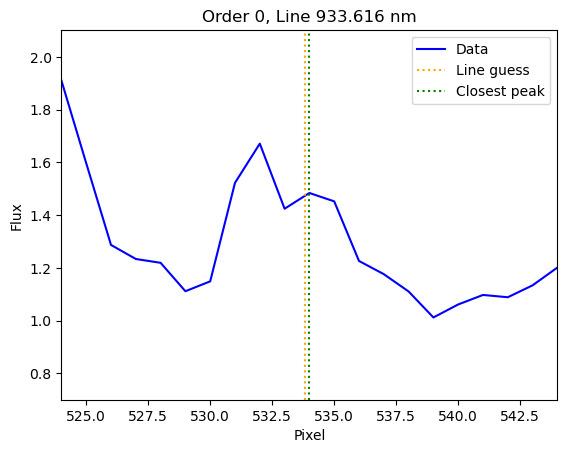

Fitting line 934.070 nm at pixel 602.32, peak height 7.07, floor 1.20


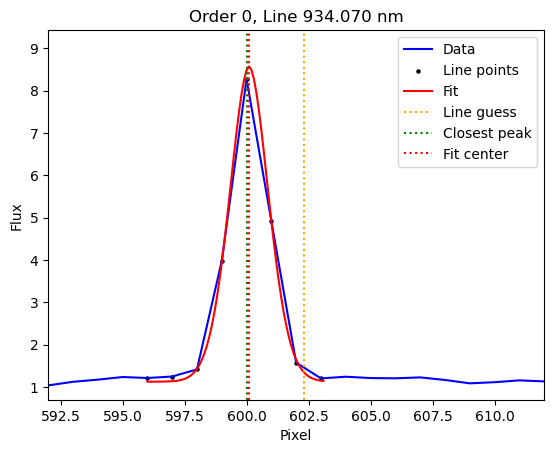

Line 934.409 nm is asymmetric - probably a blend


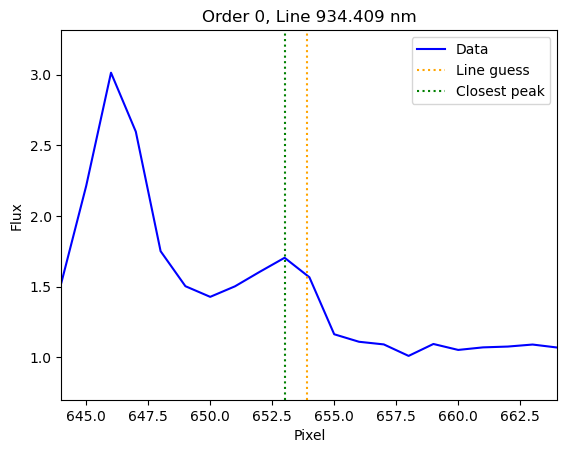

Line 934.421 nm is asymmetric - probably a blend


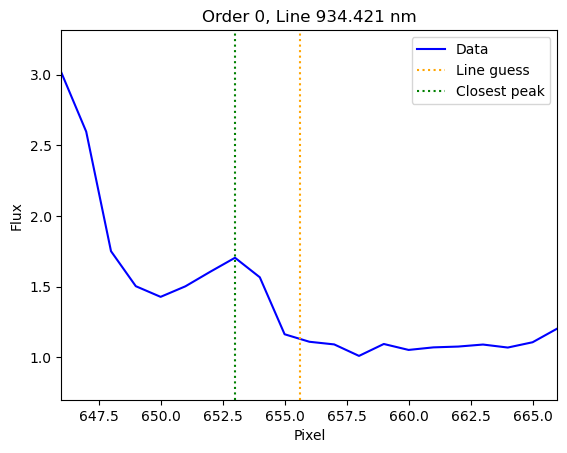

Fitting line 935.599 nm at pixel 838.24, peak height 0.41, floor 1.14


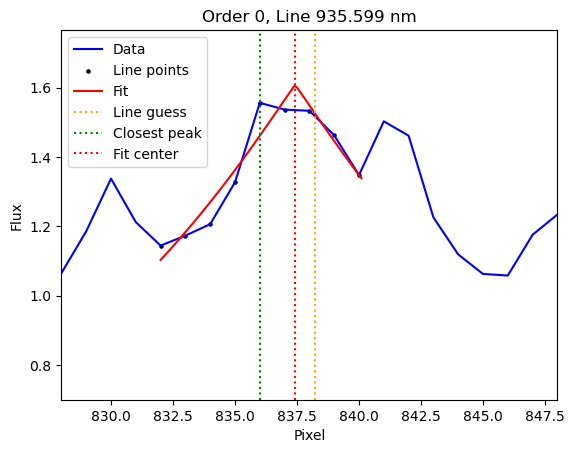

Fitting line 936.099 nm at pixel 917.26, peak height 2.23, floor 1.05


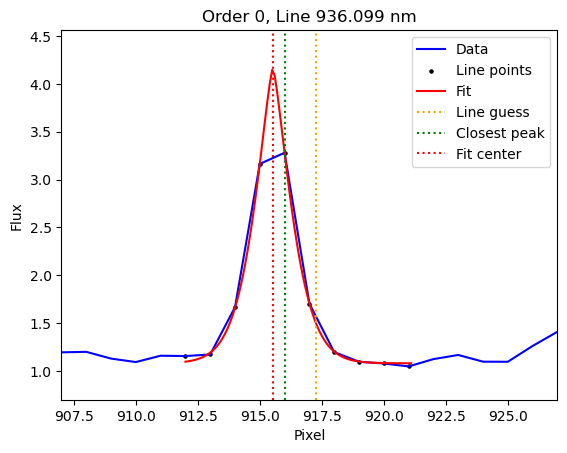

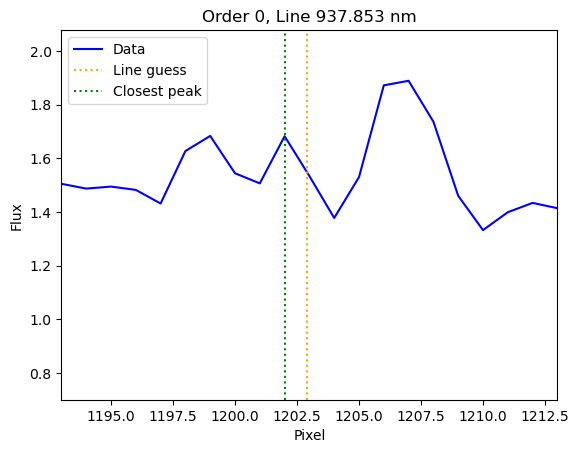

Fitting line 938.327 nm at pixel 1282.36, peak height 16.15, floor 1.10


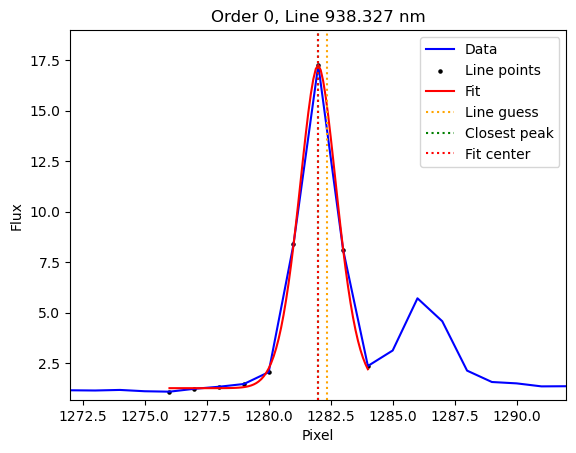

Fitting line 938.893 nm at pixel 1378.66, peak height 6.81, floor 1.03


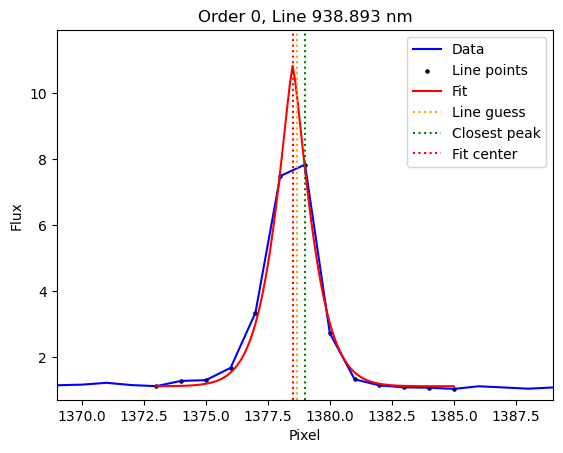

Fitting line 939.058 nm at pixel 1407.12, peak height 2.65, floor 1.11


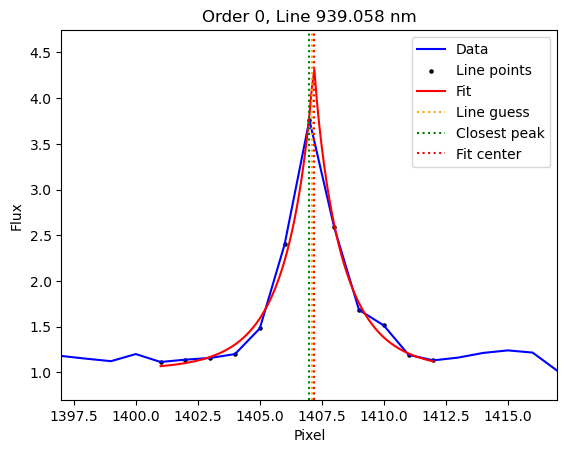

Fitting line 939.909 nm at pixel 1555.59, peak height 234.66, floor 1.31


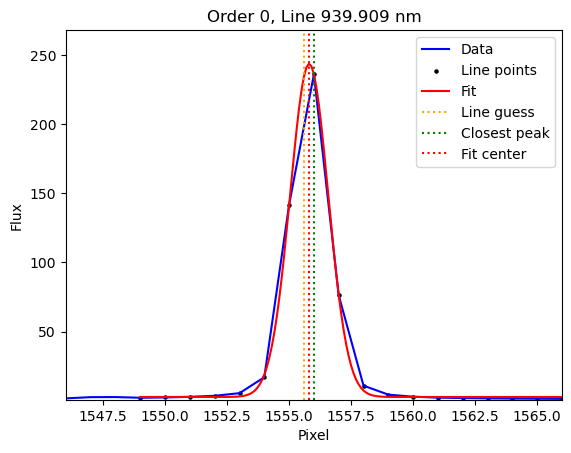

Fitting line 940.935 nm at pixel 1739.97, peak height 7.27, floor 1.25


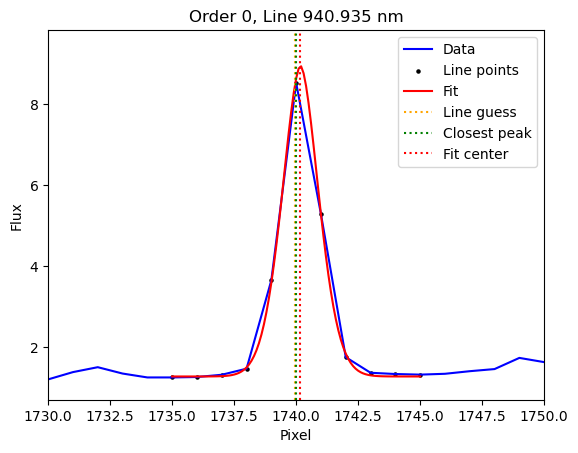

Line 941.368 nm is asymmetric - probably a blend


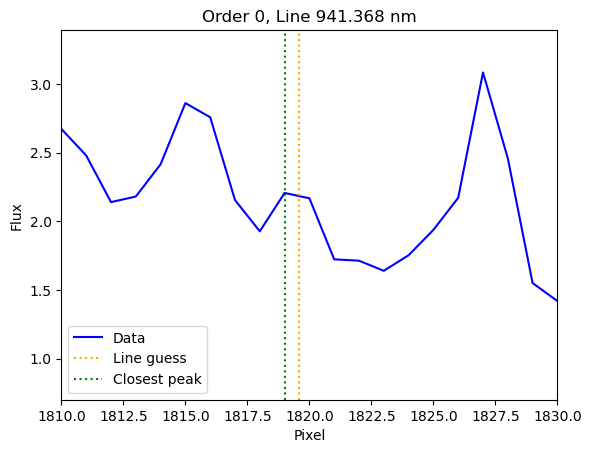

Fitting line 941.409 nm at pixel 1827.24, peak height 1.67, floor 1.41


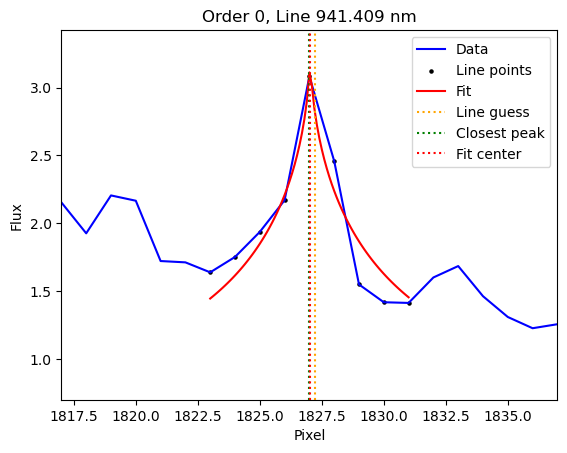

Peak height for line 941.746 nm is too low: 0.16.


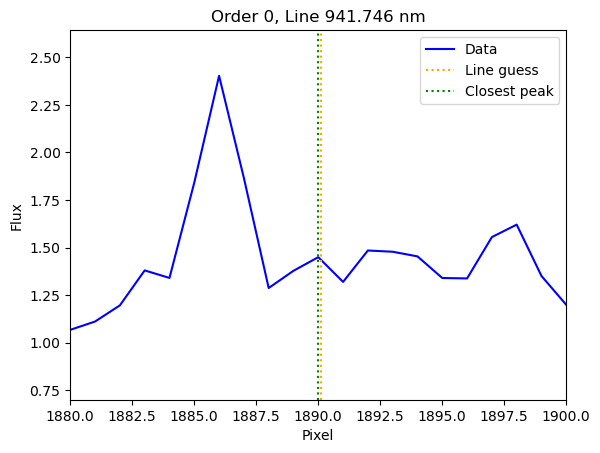

Fitting line 942.062 nm at pixel 1949.81, peak height 1.50, floor 1.27
Line 942.062 nm has fitted peak outside fitting region - discarding


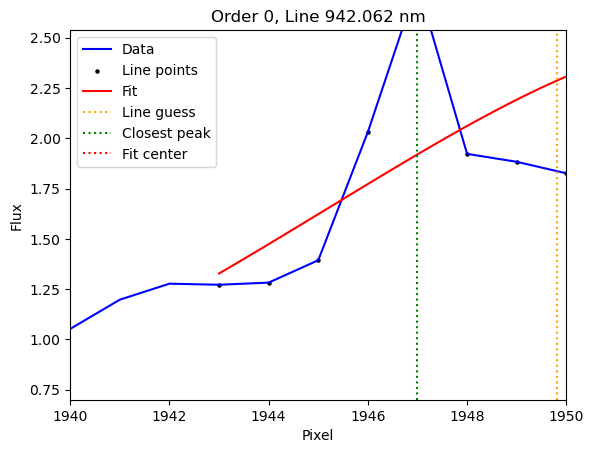

Total lines passed: 12 out of 21


In [ ]:
order = 0
# pixels = np.arange(len(extracted_ThXe[order]))
pixels = np.array(traces.y[order], dtype=int)
pixel_min, pixel_max = np.min(pixels), np.max(pixels)
wavelengths = veloce_reduction_tools.vacuum_to_air(wave[order])

flux = veloce_wavecalib.normalise_thxe_order(extracted_ThXe[order])

# lines = get_lines_in_order(wavelengths, nist_linelist, elements=['Th', 'Xe'], intensity_threshold=200, flag=['1']) # blue
# lines = get_lines_in_order(wavelengths, nist_linelist, elements=['Th', 'Xe'], intensity_threshold=200, flag=['1']) # green
lines = veloce_wavecalib.get_lines_in_order(wavelengths, nist_linelist, elements=['Th', 'Xe'], intensity_threshold=100, flag=['1']) # red
# lines = get_lines_in_order(wavelengths, nist_linelist, elements=['Th', 'Xe'], intensity_threshold=100) # red
if arm == 'green':
    # lines = get_lines_in_order(wavelengths, linelist, elements=['Th', 'Xe'], intensity_threshold=200, flag=['1'])
    peak_height_threshold = 1.0
    peak_asymmetry_threshold = 0.4
    peak_position_threshold = 3.0
elif arm == 'red':
    # lines = get_lines_in_order(wavelengths, linelist, elements=['Th', 'Xe'], intensity_threshold=100, flag=['1'])
    peak_height_threshold = 0.3
    peak_asymmetry_threshold = 0.5
    peak_position_threshold = 4.0
elif arm == 'blue':
    # For now, using similar conditions as for green arm
    # lines = get_lines_in_order(wavelengths, linelist, elements=['Th', 'Xe'], intensity_threshold=200, flag=['1'])
    peak_height_threshold = 0.7
    peak_asymmetry_threshold = 0.3
    peak_position_threshold = 3.0
else:
    raise ValueError(f"Unknown arm: {arm}. Supported arms are 'green', 'red', and 'blue'.")

pixels = np.array(pixels, dtype=np.int_)
min_pixel, max_pixel = np.min(pixels), np.max(pixels)
passed_mask = []
lines_pixel_positions = []
lines_wave_positions = []
for line in lines:
    line_wave = line['obs_wl_air(nm)']
    idx = np.argmin(np.abs(wavelengths - line_wave))
    line_pixel = min_pixel + idx + (line_wave - wavelengths[idx])/(wavelengths[idx+1] - wavelengths[idx]) \
        if line_wave - wavelengths[idx] > 0 \
        else min_pixel + idx + (line_wave - wavelengths[idx])/(wavelengths[idx] - wavelengths[idx-1])

    fit_range = slice(max(0, idx-10), min(len(pixels), idx+11))
    x_fit = pixels[fit_range]
    y_fit = flux[fit_range]

    peaks, _ = find_peaks(y_fit)
    if len(peaks) == 0:
        print(f"No peaks found for line {line_wave:.3f} nm.")
        passed_mask.append(False)
        plot_fail(x_fit, y_fit, line_pixel, line_wave, order, center=None)
        continue
    peak_idx = peaks[np.argmin(np.abs(x_fit[peaks] - (min_pixel + idx)))]
    center = x_fit[peak_idx]
    if abs(center-line_pixel) > peak_position_threshold:
        print(f"Peak {center} for line {line_wave:.3f} nm is too far from the guess pixel {line_pixel:.2f}.")
        if line_wave - wavelengths[idx] > 0:
            print((line_wave - wavelengths[idx])/(wavelengths[idx+1] - wavelengths[idx]))
        else:
            print((line_wave - wavelengths[idx])/(wavelengths[idx] - wavelengths[idx-1]))
        passed_mask.append(False)
        plot_fail(x_fit, y_fit, line_pixel, line_wave, order, center=center)
        continue

    lower_bound = peak_idx-1
    while lower_bound > 1:
        if (y_fit[lower_bound] <= y_fit[lower_bound-1] and y_fit[lower_bound] <= y_fit[lower_bound+1]):
            break
        lower_bound -= 1

    upper_bound = peak_idx + 1
    while upper_bound < len(y_fit)-1:
        if (y_fit[upper_bound] <= y_fit[upper_bound-1] and y_fit[upper_bound] <= y_fit[upper_bound+1]):
            break
        upper_bound += 1

    line_floor = np.min(y_fit[lower_bound:upper_bound+1])
    peak_height = y_fit[peak_idx] - line_floor
    if peak_height < peak_height_threshold:
        print(f"Peak height for line {line_wave:.3f} nm is too low: {peak_height:.2f}.")
        passed_mask.append(False)
        plot_fail(x_fit, y_fit, line_pixel, line_wave, order, center=center)
        continue
    if (y_fit[lower_bound]-line_floor)/peak_height > peak_asymmetry_threshold or (y_fit[upper_bound]-line_floor)/peak_height > peak_asymmetry_threshold:
        print(f"Line {line_wave:.3f} nm is asymmetric - probably a blend")
        passed_mask.append(False)
        plot_fail(x_fit, y_fit, line_pixel, line_wave, order, center=center)
        continue
    fit_mask = np.zeros_like(y_fit, dtype=bool)
    fit_mask[lower_bound:upper_bound+1] = True
    x_fit_masked = x_fit[fit_mask]
    y_fit_masked = y_fit[fit_mask]
    if len(x_fit_masked) < 5: # Not enough points to fit
        passed_mask.append(False)
        
        continue

    print(f"Fitting line {line_wave:.3f} nm at pixel {line_pixel:.2f}, peak height {peak_height:.2f}, floor {line_floor:.2f}")

    p0 = [y_fit[peak_idx], line_pixel, 2, 2, line_floor]
    bounds = ([0.9*y_fit[peak_idx], line_pixel-3, 1e-3, 1e-3, 0], [2*y_fit[peak_idx], line_pixel+3, 10, 10, np.max(y_fit)])
    try:
        popt, _ = curve_fit(veloce_wavecalib.general_gaussian, x_fit_masked, y_fit_masked, p0=p0, bounds=bounds)
        if min(x_fit)<popt[1]<max(x_fit):
            passed_mask.append(True)
            lines_pixel_positions.append(popt[1])
            lines_wave_positions.append(line_wave)

            plt.plot(x_fit, y_fit, 'b-', label='Data')
            plt.scatter(x_fit_masked, y_fit_masked, c='k', s=5, label='Line points')
            x_fine = np.arange(x_fit_masked.min(), x_fit_masked.max()+0.1, 0.1)
            plt.plot(x_fine, veloce_wavecalib.general_gaussian(x_fine, *popt), 'r-', label='Fit')
            plt.axvline(line_pixel, c='orange', ls=':', label='Line guess')
            plt.axvline(center, c='green', ls=':', label='Closest peak')
            plt.axvline(popt[1], c='red', ls=':', label='Fit center')
            plt.title(f"Order {order}, Line {line_wave:.3f} nm")
            plt.xlim(x_fit.min(), x_fit.max())
            plt.ylim(y_fit.min()*0.9, veloce_wavecalib.general_gaussian(x_fine, *popt).max()*1.1)
            plt.xlabel('Pixel')
            plt.ylabel('Flux')
            plt.legend()
            plt.show()
        else:
            print(f"Line {line_wave:.3f} nm has fitted peak outside fitting region - discarding")
            passed_mask.append(False)
            plot_fail(x_fit, y_fit, line_pixel, line_wave, order, center=None)
        

    except Exception as e:
        print(f"Fit failed for line {line_wave:.3f} nm: {e}")
        passed_mask.append(False)
        plot_fail(x_fit, y_fit, line_pixel, line_wave, order, center=None)

    
passed_mask = np.array(passed_mask)
print(f"Total lines passed: {np.sum(passed_mask)} out of {len(lines)}")

##### Fit all lines

In [20]:
air_wave = [veloce_reduction_tools.vacuum_to_air(wave[i]) for i in range(len(wave))]
pixel_positions, wave_positions, order_positions = veloce_wavecalib.fit_all_lines_per_order(
        air_wave, extracted_ThXe, ORDER, traces, nist_linelist, arm, veloce_paths, plot=False)

Fitting lines in order 65 (1/40)
Using window size: 57
Detected 1046 peaks using signal method with window size 57
Detected 1046 peaks using signal method with window size 57
Total detected peaks: 1046
Max variance: 502815250282.34, Variance penalty range: 0.00 - 1.00
Final nknot after moving knots and dropping close pairs: 17 out of 17
Found 21 lines in the order.
Peak height for line 930.001 nm is too low: 0.08.
Fitting line 930.789 nm at pixel 122.35, peak height 0.59, floor 1.17
Fitting line 931.044 nm at pixel 158.47, peak height 0.46, floor 0.99
Fitting line 931.773 nm at pixel 262.73, peak height 1.34, floor 1.11
Peak height for line 932.007 nm is too low: 0.16.
Line 933.616 nm is asymmetric - probably a blend
Fitting line 934.070 nm at pixel 602.32, peak height 7.78, floor 1.14
Line 934.409 nm is asymmetric - probably a blend
Line 934.421 nm is asymmetric - probably a blend
Fitting line 935.599 nm at pixel 838.24, peak height 0.44, floor 1.04
Fitting line 936.099 nm at pixel 91

/home/usqobserver2/anaconda3/envs/reduce_spectro/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Detected 1724 peaks using signal method with window size 120
Detected 1724 peaks using signal method with window size 120
Total detected peaks: 1724
Max variance: 455333299863.16, Variance penalty range: 0.00 - 1.00
Removing duplicate knots after placement.
Final nknot after moving knots and dropping close pairs: 16 out of 17
Found 71 lines in the order.
Peak 151 for line 903.182 nm is too far from the guess pixel 145.81.
-0.19191373852296326
Peak 151 for line 903.246 nm is too far from the guess pixel 155.10.
0.10340867915115261
Fitting line 903.789 nm at pixel 234.82, peak height 0.76, floor 1.06
Fitting line 903.869 nm at pixel 246.60, peak height 0.50, floor 1.12
Fitting line 904.012 nm at pixel 267.81, peak height 2.66, floor 1.24
Line 904.535 nm is asymmetric - probably a blend
Peak 372 for line 904.671 nm is too far from the guess pixel 366.36.
0.3639112939428956
Line 904.696 nm is asymmetric - probably a blend
Fitting line 904.825 nm at pixel 389.58, peak height 25.80, floor 2.

In [22]:
len(pixel_positions)

2014

### Fit wavelength solution

##### Fit Polynomial per order

In [185]:
polynomials = fit_polynomial_per_order(pixel_positions, order_positions, wave_positions, degree=5, sigma_clip=1.8)
new_wave = [poly[0](y) for poly, y in zip(polynomials.values(), traces.y)]

/tmp/ipykernel_13418/31139360.py:16: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x[inlier_mask], y[inlier_mask], degree)


##### Plot poly fit

In [186]:
%matplotlib inline
plt.close('all')

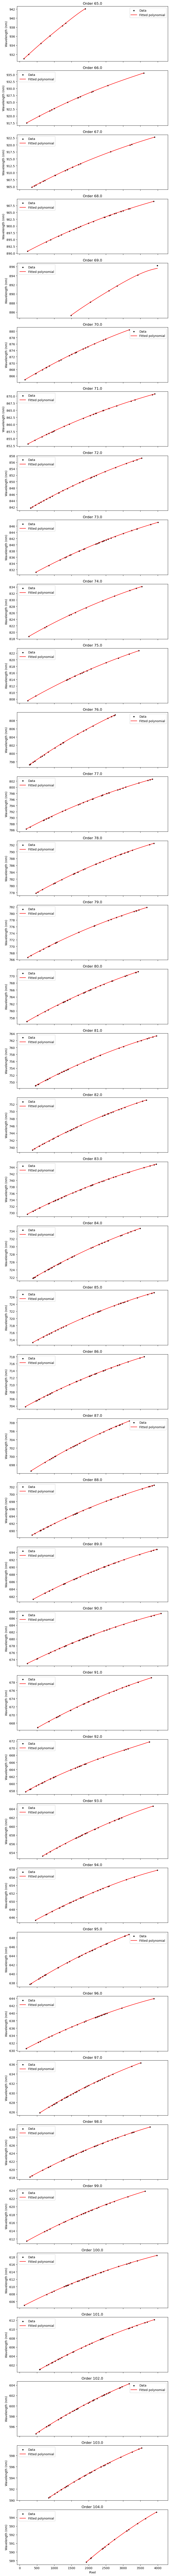

In [187]:
%matplotlib inline
plt.close('all')

unique_orders = np.unique(order_positions)
fig, axs = plt.subplots(len(unique_orders), 1, figsize=(8, 3 * len(unique_orders)), sharex=True)

if len(unique_orders) == 1:
    axs = [axs]

for i, order in enumerate(unique_orders):
    mask = order_positions == order
    x = pixel_positions[mask]
    y = wave_positions[mask]
    poly, residuals, inlier_mask = polynomials[order]
    x_fit = np.linspace(x.min(), x.max(), 500)
    y_fit = poly(x_fit)
    axs[i].scatter(x, y, s=10, c='k', label='Data')
    axs[i].plot(x_fit, y_fit, 'r-', label='Fitted polynomial')
    axs[i].set_title(f'Order {order}')
    axs[i].set_ylabel('Wavelength (nm)')
    axs[i].legend()

axs[-1].set_xlabel('Pixel')
plt.tight_layout()
plt.show()

In [ ]:
%matplotlib inline
plt.close('all')

unique_orders = np.unique(order_positions)
fig, axs = plt.subplots(len(unique_orders), 1, figsize=(8, 3 * len(unique_orders)), sharex=True)

if len(unique_orders) == 1:
    axs = [axs]

for i, order in enumerate(unique_orders):
    mask = order_positions == order
    x = pixel_positions[mask]
    y = wave_positions[mask]
    poly, residuals, inlier_mask = polynomials[order]
    # x_fit = np.linspace(x.min(), x.max(), 500)
    y_fit = poly(x)
    axs[i].scatter(x[inlier_mask], y[inlier_mask] - y_fit[inlier_mask], marker='o', s=5, color='k', label='residuals')
    axs[i].scatter(x[~inlier_mask], y[~inlier_mask] - y_fit[~inlier_mask], marker='x', s=5, color='r', label='outliers')
    _wave = poly(np.arange(4012))
     
    axs[i].axhline(0, color='gray', ls='--')
    # axs[i].plot(x_fit, y_fit, 'r-', label='Fitted polynomial')
    # uncertainty = np.std(residuals[inlier_mask])/np.sqrt(np.sum(inlier_mask)) * np.nanmean(np.diff(_wave)) / np.nanmean(_wave) * c
    # uncertainty = np.std(residuals[inlier_mask]) * np.nanmean(np.diff(_wave)) / np.nanmean(_wave) * c
    uncertainty = np.std(residuals[inlier_mask]/y[inlier_mask]) * c / np.sqrt(np.sum(inlier_mask))
    axs[i].set_title(f'Order {order}, {uncertainty:.4f} m/s')
    axs[i].set_ylabel(r'$\Delta$ Wavelength (nm)')
    axs[i].legend()

axs[-1].set_xlabel('Pixel')
plt.tight_layout()
plt.show()

In [ ]:
polynomial_residuals, polynomial_mask, polynomial_wave = [], [], []
for order, trace_y in zip(unique_orders, traces.y):
    polynomial_wave.append(polynomials[order][0](trace_y))
    polynomial_residuals.extend(polynomials[order][1])
    polynomial_mask.extend(polynomials[order][2])
polynomial_residuals = np.array(polynomial_residuals)
polynomial_mask = np.array(polynomial_mask, dtype=bool)

In [ ]:
np.sum(polynomial_mask), len(polynomial_mask)

(837, 1111)

In [ ]:
np.std(polynomial_residuals[polynomial_mask]/wave_positions[polynomial_mask])*c / np.sqrt(np.sum(polynomial_mask))

64.13565831560054

In [ ]:
np.mean(polynomial_residuals[polynomial_mask])

8.435295111250901e-06

##### Fit surface wavesolution

In [23]:
max_extracted_pixel = max([max(trace_y) for trace_y in traces.y])
min_extracted_pixel = min([min(trace_y) for trace_y in traces.y])
full_pixels = np.array([np.arange(min_extracted_pixel, max_extracted_pixel + 1) for _ in range(len(extracted_ThXe))])

In [24]:
# Z, C, fitted_points, residuals, mask = fit_surface_custom(pixel_positions, order_positions, wave_positions, full_pixels, degree=3)

In [25]:
Z, residuals, mask, model, converged = veloce_wavecalib.fit_surface_sklearn(pixel_positions, order_positions, wave_positions, full_pixels, degree=7, sigma_clip=2.3, n_limit=9, robust=False) # red
# Z, residuals, mask, model, converged = veloce_wavecalib.fit_surface_sklearn(pixel_positions, order_positions, wave_positions, full_pixels, degree=7, sigma_clip=2.2, n_limit=9, robust=False) # green
# Z, residuals, mask, model, converged = veloce_wavecalib.fit_surface_sklearn(norm_pixel_positions, norm_order_positions, norm_wave_positions, full_pixels, degree=7, sigma_clip=2.3, n_limit=8, robust=False) # blue
stdev_vel = np.std(residuals[mask]/order_positions[mask]/wave_positions[mask])*c/np.sqrt(np.sum(mask))
print(f"SEM: {stdev_vel:.2f}, with mean deviation from model: {np.mean(residuals[mask]):.2e}, based on {np.sum(mask)}/{len(mask)} points.")

Converged.
Std of residuals dropped from 0.831 to 0.033 after 24 iterations.
SEM: 4.72, with mean deviation from model: 4.24e-11, based on 1190/2014 points.


In [78]:
# wave_integrated = veloce_wavecalib.calibrate_absolute_Th(traces, data, veloce_paths, arm, plot=True, plot_filename="test_250812", th_linelist_filename='Default')

##### Plot Surface Fit

In [139]:
%matplotlib widget

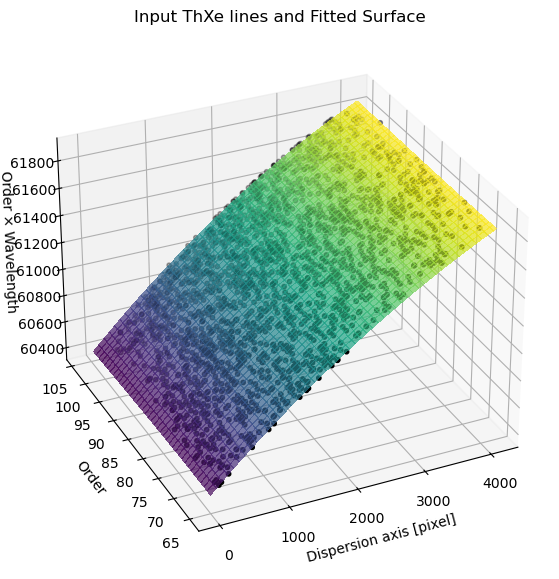

In [ ]:
# plt.close('all')

# fig = plt.figure(figsize=(15, 7))
# ax = fig.add_subplot(111, projection='3d')
# ax.view_init(elev=30, azim=245)

# # Plot fitted surface
# X, Y = np.meshgrid(full_pixels[0], np.unique(order_positions))
# ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, linewidth=0, antialiased=False)

# # Plot input data points
# # 3D scatter plot (main)
# ax.scatter(pixel_positions, order_positions, order_positions * wave_positions, c='k', s=10, label='Input data')

# ax.set_xlabel('Dispersion axis [pixel]')
# ax.set_ylabel('Order')
# ax.set_zlabel('Order × Wavelength')
# ax.set_title('Input ThXe lines and Fitted Surface')
# # ax.legend()
# plt.show()

veloce_diagnostic.plot_ArcTh_surface(Z, pixel_positions, order_positions, wave_positions, full_pixels, veloce_paths, filename='test')

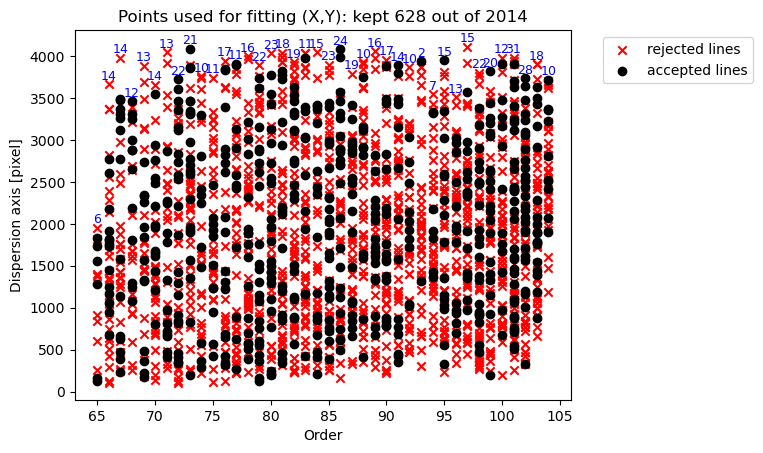

In [ ]:
# plt.close('all')
# # order = 9
# fig, ax = plt.subplots()

# if np.sum(mask)/len(mask)<=0.5:
#     ax.scatter(order_positions[~mask], pixel_positions[~mask], color='r', marker='x', label='rejected lines')
#     ax.scatter(order_positions[mask], pixel_positions[mask], color='k', marker='o', label='accepted lines')
# else:
#     ax.scatter(order_positions[mask], pixel_positions[mask], color='k', marker='o', label='accepted lines')
#     ax.scatter(order_positions[~mask], pixel_positions[~mask], color='r', marker='x', label='rejected lines')

# # Label number of used points above point with highest pixel per order
# for order_val in np.unique(order_positions):
#     in_order = (order_positions == order_val)
#     in_order_mask = in_order & mask
#     if np.any(in_order):
#         # Find the point with the highest pixel in this order (regardless of mask)
#         max_pixel = np.max(pixel_positions[in_order])
#         idx = np.where(in_order & (pixel_positions == max_pixel))[0]
#         if len(idx) > 0:
#             idx = idx[0]
#             n_used = np.sum(in_order_mask)
#             ax.text(order_positions[idx], pixel_positions[idx]+20, f"{n_used}",
#                     ha='center', va='bottom', fontsize=9, color='blue')

# # Move legend outside the plot
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# ax.set_xlabel('Order')
# ax.set_ylabel('Dispersion axis [pixel]')
# ax.set_title(f'Points used for fitting (X,Y): kept {np.sum(mask)} out of {len(mask)}')
# # plt.legend()
# plt.show()

veloce_diagnostic.plot_ArcTh_points_positions(pixel_positions, order_positions, mask, veloce_paths, filename='test')

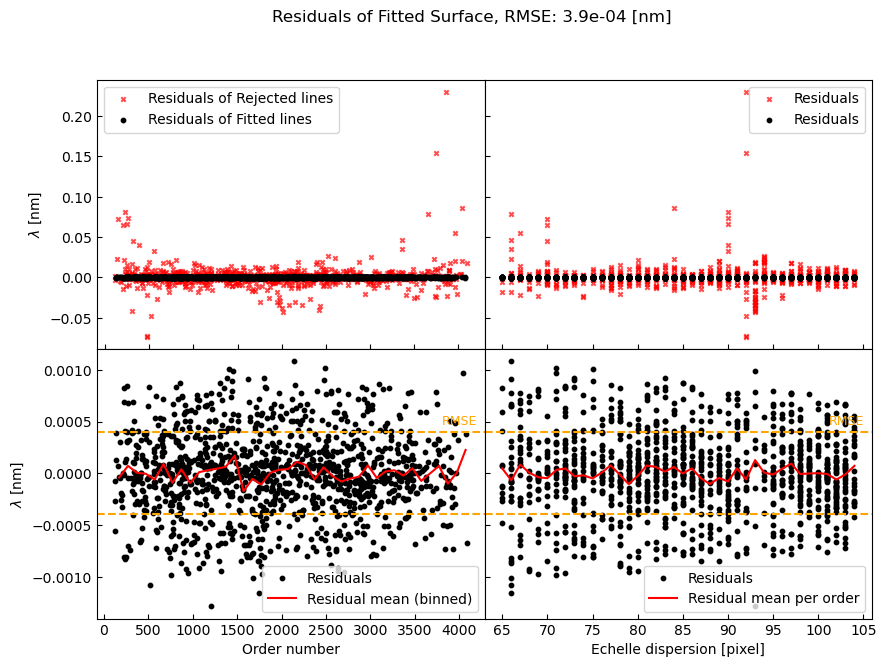

In [38]:
# per_order_residual_mean = []
# for order in np.unique(order_positions):
#     in_order_mask = (order_positions == order)
#     in_order_mask *= mask
#     # in_order_residual_mean = np.mean(residuals[in_order_mask]/order_positions[in_order_mask]/wave_positions[in_order_mask]*c)
#     in_order_residual_mean = np.mean(residuals[in_order_mask]/order_positions[in_order_mask])
#     # print(in_order_residual_mean)
#     per_order_residual_mean.append(in_order_residual_mean)
#     # print(f"Order {order}: {np.sum(in_order*mask)} points")

# dispersion_binned_mean = []
# dispersion_bin_pos = []
# bin_size = 100

# for dispersion_bin in np.arange(np.min(pixel_positions[mask]), np.max(pixel_positions[mask]), bin_size):
#     dispersion_bin_pos.append(dispersion_bin+bin_size/2)
#     bin_mask = (pixel_positions>dispersion_bin) & (pixel_positions<dispersion_bin+bin_size)
#     bin_mask *= mask
#     # in_bin_residual_mean = np.mean(residuals[bin_mask]/order_positions[bin_mask]/wave_positions[bin_mask]*c)
#     in_bin_residual_mean = np.mean(residuals[bin_mask]/order_positions[bin_mask])
#     # print(in_bin_residual_mean)
#     dispersion_binned_mean.append(in_bin_residual_mean)

# plt.close('all')
# fig, axes = plt.subplots(2, 2, figsize=(10, 7), gridspec_kw={'hspace': 0, 'wspace': 0})

# # axes[0,0].scatter(order_positions[mask], residuals[mask]/order_positions[mask]/wave_positions[mask]*c, c='k', s=10, label='Residuals')
# # axes[0,0].plot(np.unique(order_positions), per_order_residual_mean, c='r', label='Residual mean')
# # axes[1,0].scatter(order_positions[~mask], residuals[~mask]/order_positions[~mask]/wave_positions[~mask]*c, c='r', s=10, marker='x', alpha=0.7, label='Residuals')
# # axes[1,0].scatter(order_positions[mask], residuals[mask]/order_positions[mask]/wave_positions[mask]*c, c='k', s=10, label='Residuals')
# axes[0,0].scatter(order_positions[mask], residuals[mask]/order_positions[mask], c='k', s=10, label='Residuals')
# axes[0,0].plot(np.unique(order_positions), per_order_residual_mean, c='r', label='Residual mean')
# axes[0,0].axhline(np.std(residuals[mask]/order_positions[mask]), color='orange', ls='--')
# axes[0,0].axhline(-1*np.std(residuals[mask]/order_positions[mask]), color='orange', ls='--')
# axes[1,0].scatter(order_positions[~mask], residuals[~mask]/order_positions[~mask], c='r', s=10, marker='x', alpha=0.7, label='Residuals')
# axes[1,0].scatter(order_positions[mask], residuals[mask]/order_positions[mask], c='k', s=10, label='Residuals')

# # axes[0,1].scatter(pixel_positions[mask], residuals[mask]/order_positions[mask]/wave_positions[mask]*c, c='k', s=10, label='Residuals')
# # axes[0,1].plot(dispersion_bin_pos, dispersion_binned_mean, c='r', label='Residual mean')
# # axes[1,1].scatter(pixel_positions[~mask], residuals[~mask]/order_positions[~mask]/wave_positions[~mask]*c, c='r', s=10, marker='x', alpha=0.7, label='Residuals')
# # axes[1,1].scatter(pixel_positions[mask], residuals[mask]/order_positions[mask]/wave_positions[mask]*c, c='k', s=10, label='Residuals')
# axes[0,1].scatter(pixel_positions[mask], residuals[mask]/order_positions[mask], c='k', s=10, label='Residuals')
# axes[0,1].plot(dispersion_bin_pos, dispersion_binned_mean, c='r', label='Residual mean')
# axes[0,1].axhline(np.std(residuals[mask]/order_positions[mask]), color='orange', ls='--')
# axes[0,1].axhline(-1*np.std(residuals[mask]/order_positions[mask]), color='orange', ls='--')
# axes[1,1].scatter(pixel_positions[~mask], residuals[~mask]/order_positions[~mask], c='r', s=10, marker='x', alpha=0.7, label='Residuals')
# axes[1,1].scatter(pixel_positions[mask], residuals[mask]/order_positions[mask], c='k', s=10, label='Residuals')

#     # Set tick direction to 'in' for all subplots
# for ax in axes.flat:
#     ax.tick_params(direction='in', which='both', bottom=True, top=True, left=True, right=True)

# # Remove labels from specific subplots
# axes[0,0].tick_params(labelbottom=False)  # Remove x-labels from top left
# axes[0,1].tick_params(labelbottom=False, labelleft=False)  # Remove both labels from top right
# axes[1,1].tick_params(labelleft=False)

# # ax.set_xlabel('Dispersion axis [pixel]')
# axes[1,0].set_xlabel('Order')
# axes[1,1].set_xlabel('Dispersion [pixel]')
# # axes[0,0].set_ylabel('Velocity [m/s]')
# # axes[1,0].set_ylabel('Velocity [m/s]')
# axes[0,0].set_ylabel(r'$\Delta \lambda$ [nm]')
# axes[1,0].set_ylabel(r'$\Delta \lambda$ [nm]')
# # ax.set_zlabel('wavelenght')
# # plt.suptitle('Residuals of Fitted Surface for {arm} arm, precision: {:.2f} m/s'.format(stdev_vel*np.sqrt(np.sum(mask))))
# # plt.suptitle('Residuals of Fitted Surface for {} arm, precision: {:.1e} nm'.format(arm, np.std(residuals[mask]/order_positions[mask])))
# plt.suptitle('Residuals of Fitted Surface for {} arm, RMS: {:.2e} nm'.format(
#     arm, np.sqrt(np.mean(np.square(residuals[mask]/order_positions[mask])))))

veloce_diagnostic.plot_ArcTh_residuals(residuals, order_positions, pixel_positions, wave_positions, mask, veloce_paths, filename='test', plot_type='wavelength')

In [270]:
for order in np.unique(order_positions):
    in_order = order_positions == order
    print(f"Order {order}: {np.sum(in_order*mask)} points")

Order 139.0: 24 points
Order 140.0: 42 points
Order 141.0: 52 points
Order 142.0: 60 points
Order 143.0: 51 points
Order 144.0: 50 points
Order 145.0: 44 points
Order 146.0: 52 points
Order 147.0: 45 points
Order 148.0: 51 points
Order 149.0: 49 points
Order 150.0: 46 points
Order 151.0: 46 points
Order 152.0: 38 points
Order 153.0: 39 points
Order 154.0: 25 points
Order 155.0: 22 points
Order 156.0: 15 points
Order 157.0: 8 points
Order 158.0: 22 points
Order 159.0: 15 points
Order 160.0: 23 points
Order 161.0: 35 points
Order 162.0: 20 points
Order 163.0: 31 points
Order 164.0: 37 points
Order 165.0: 25 points
Order 166.0: 30 points
Order 167.0: 22 points


In [40]:
# for order in np.unique(order_positions):
#     in_order = order_positions == order
#     print(f"Stdev of order {order}: is {np.std(residuals[in_order*mask]/order_positions[in_order*mask]/wave_positions[in_order*mask])*c/np.sqrt(np.sum(in_order*mask))}")

In [39]:
# plt.close('all')

# fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, projection='3d')

# # Plot fitted surface
# # X, Y = np.meshgrid(full_pixels[0], np.unique(order_positions))
# # ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, linewidth=0, antialiased=False)

# # Plot input data points
# # ax.scatter(fitted_points[:, 0], fitted_points[:, 1], residuals/fitted_points[:, 1], c='k', s=10, label='Residuals', alpha=0.5)
# # ax.scatter(pixel_positions, order_positions, order_positions*wave_positions, c='k', s=10, label='Residuals', alpha=0.5)
# # ax.scatter(pixel_positions, order_positions, wave_positions, c='k', s=10, label='IResiduals', alpha=0.5)
# # ax.scatter(pixel_positions, order_positions, residuals/order_positions/wave_positions*c, c='k', s=10, label='Residuals', alpha=0.5)
# # ax.scatter(pixel_positions[mask], order_positions[mask], residuals[mask]/order_positions[mask]/wave_positions[mask]*c, c='k', s=10, label='Residuals', alpha=0.5)
# ax.scatter(pixel_positions[mask], order_positions[mask], residuals[mask]/order_positions[mask]/wave_positions[mask]*c, c='k', s=10, label='Residuals', alpha=0.5)

# ax.set_xlabel('Dispersion axis [pixel]')
# ax.set_ylabel('Order')
# ax.set_zlabel('Velocity [m/s]')
# # ax.set_zlabel('wavelenght')
# ax.set_title('Residuals of Fitted Surface, SEM: {:.4f} m/s'.format(stdev_vel))
# ax.legend()
# plt.show()

In [40]:
# edge = max(abs(np.min(residuals[mask]/order_positions[mask]/wave_positions[mask]*c)), np.min(residuals[mask]/order_positions[mask]/wave_positions[mask]*c))
# step = 50
# edge = np.round(edge, -2)+step
# bins = np.arange(-1*edge, edge+1, step)

# plt.close('all')

# fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot()
# # ax.hist(residuals/order_positions/wave_positions*c, bins=bins, align='mid')
# ax.hist(residuals[mask]/order_positions[mask]/wave_positions[mask]*c, bins=bins, align='mid')
# # ax.hist(residuals[mask]/order_positions[mask]/wave_positions[mask]*c, align='mid')
# ax.set_xlabel('Residual [m/s]')
# ax.set_ylabel('Counts')
# ax.grid()
# # ax.set_zlabel('wavelenght')
# ax.set_title('Residuals of Fitted Surface, std: {:.4f} m/s'.format(stdev_vel*np.sqrt(np.sum(mask))))
# ax.legend()
# plt.show()

##### Save ThXe static WAVE SOLUTION

In [50]:
# new_wave = [np.array(Z[i, int(min(trace_y)):int(max(trace_y)+1)])/absolute_order for i, absolute_order, trace_y in zip(range(len(ORDER)), ORDER, traces.y)]
new_wave = [model.predict((np.column_stack([trace_y, np.ones_like(trace_y)*absolute_order])))/absolute_order for i, absolute_order, trace_y in zip(range(len(ORDER)), ORDER, traces.y)]
print(f"New wavelength solution covers from {min([min(w) for w in new_wave]):.3f} nm to {max([max(w) for w in new_wave]):.3f} nm")
# for w in new_wave:
#     print(min(w), max(w))

New wavelength solution covers from 580.885 nm to 942.066 nm


In [52]:
with open('./Wave/arcTh_wave_{date}_{arm}.pkl'.format(date=date, arm=arm), 'wb') as f:
    pickle.dump(new_wave, f)

##### Plot spectra with wave solution

In [42]:
%matplotlib widget

Found 32 lines in the order.


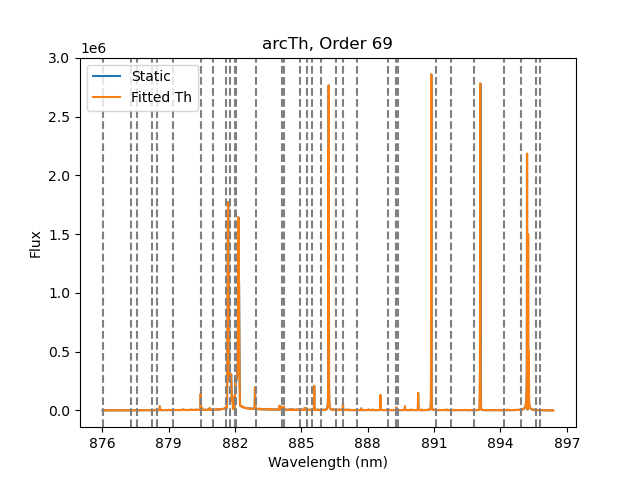

In [44]:
import matplotlib.ticker as mticker

order = 4
plt.close('all')
plt.plot(
    veloce_reduction_tools.vacuum_to_air(wave[order]),
    extracted_ThXe[order],
    label='Static')
plt.plot(
    new_wave[order],
    extracted_ThXe[order],
    label='Fitted Th')
lines = veloce_wavecalib.get_lines_in_order(new_wave[order], nist_linelist, elements=['Th'], intensity_threshold=200, flag=['1'])
for line in lines:
    plt.axvline(line['obs_wl_air(nm)'], color='grey', linestyle='--')
# Force x ticks to be integer values
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict()
for h, l in zip(handles, labels):
    if l not in unique:
        unique[l] = h
plt.legend(unique.values(), unique.keys())
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux')
plt.title(f'arcTh, Order {ORDER[order]}')
plt.show()


Found 57 lines in the order.


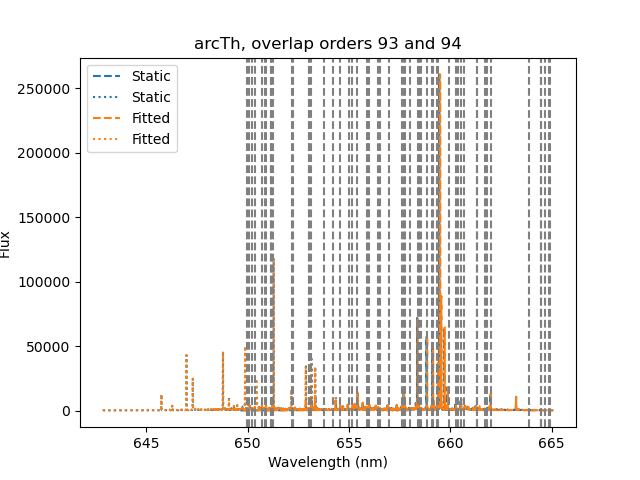

In [47]:
order = 28
plt.close('all')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.plot(veloce_reduction_tools.vacuum_to_air(wave[order]), extracted_ThXe[order], linestyle='--', color=colors[0], label='Static')
plt.plot(veloce_reduction_tools.vacuum_to_air(wave[order+1]), extracted_ThXe[order+1], linestyle=':', color=colors[0], label='Static')
plt.plot(new_wave[order], extracted_ThXe[order], linestyle='--', color=colors[1], label='Fitted')
plt.plot(new_wave[order+1], extracted_ThXe[order+1], linestyle=':', color=colors[1], label='Fitted')
lines = veloce_wavecalib.get_lines_in_order(new_wave[order], nist_linelist, elements=['Th'], intensity_threshold=200, flag=['1'])
for line in lines:
    plt.axvline(line['obs_wl_air(nm)'], color='grey', linestyle='--')
# Remove duplicate labels in legend
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict()
for h, l in zip(handles, labels):
    if l not in unique:
        unique[l] = h
plt.legend(unique.values(), unique.keys())
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux')
plt.title(f'arcTh, overlap orders {ORDER[order]} and {ORDER[order+1]}')
plt.legend()
plt.show()

In [49]:
plt.close('all')

##### validate arms overlap

In [57]:
%matplotlib widget

In [71]:
veloce_paths.wave_dir

'/home/usqobserver2/Joachim_veloce/veloce_reduction_dev/veloce_reduction/Wave'

In [148]:
date = '230826'
# date = '240410'
new_green_wave = pickle.load(open(os.path.join(veloce_paths.wave_dir, f'ThXe_wave_{date}_green.pkl'), 'rb'))
new_red_wave = pickle.load(open(os.path.join(veloce_paths.wave_dir, f'ThXe_wave_{date}_red.pkl'), 'rb'))
# new_blue_wave = pickle.load(open(os.path.join(veloce_paths.wave_dir, f'ThXe_wave_{date}_blue.pkl'), 'rb'))


In [50]:
red_traces = veloce_reduction_tools.Traces.load_traces(os.path.join(veloce_paths.trace_dir, 'veloce_red_4amp_sim_calib_trace.pkl'))
green_traces = veloce_reduction_tools.Traces.load_traces(os.path.join(veloce_paths.trace_dir, 'veloce_green_4amp_sim_calib_trace.pkl'))
blue_traces = veloce_reduction_tools.Traces.load_traces(os.path.join(veloce_paths.trace_dir, 'veloce_blue_4amp_sim_calib_trace.pkl'))

In [51]:
ORDER, COEFFS, MATCH_LAM, MATCH_PIX, MATCH_LRES, GUESS_LAM, Y0 = veloce_reduction_tools.load_prefitted_wave(arm='green', wave_path=veloce_paths.wave_dir)
old_green_wave = veloce_reduction_tools.calibrate_orders_to_wave(None, Y0, COEFFS, traces=green_traces)

In [52]:
ORDER, COEFFS, MATCH_LAM, MATCH_PIX, MATCH_LRES, GUESS_LAM, Y0 = veloce_reduction_tools.load_prefitted_wave(arm='red', wave_path=veloce_paths.wave_dir)
old_red_wave = veloce_reduction_tools.calibrate_orders_to_wave(None, Y0, COEFFS, traces=red_traces)

In [53]:
ORDER, COEFFS, MATCH_LAM, MATCH_PIX, MATCH_LRES, GUESS_LAM, Y0 = veloce_reduction_tools.load_prefitted_wave(arm='blue', wave_path=veloce_paths.wave_dir)
old_blue_wave = veloce_reduction_tools.calibrate_orders_to_wave(None, Y0, COEFFS, traces=blue_traces)

In [54]:
master_filename = f'{veloce_paths.master_dir}/master_ARC-ThAr_red_{date}.fits'
# veloce_reduction_tools.save_image_fits(master_filename, data, header)
with fits.open(master_filename) as hdul:
    red_data= hdul[0].data
    header = hdul[0].header
master_filename = f'{veloce_paths.master_dir}/master_ARC-ThAr_green_{date}.fits'
# veloce_reduction_tools.save_image_fits(master_filename, data, header)
with fits.open(master_filename) as hdul:
    green_data= hdul[0].data
    header = hdul[0].header
master_filename = f'{veloce_paths.master_dir}/master_ARC-ThAr_blue_{date}.fits'
# veloce_reduction_tools.save_image_fits(master_filename, data, header)
with fits.open(master_filename) as hdul:
    blue_data= hdul[0].data
    header = hdul[0].header

In [55]:
red_extracted_thxe, _ = veloce_reduction_tools.extract_orders_with_trace(red_data, red_traces)
green_extracted_thxe, _ = veloce_reduction_tools.extract_orders_with_trace(green_data, green_traces)
blue_extracted_thxe, _ = veloce_reduction_tools.extract_orders_with_trace(blue_data, blue_traces)

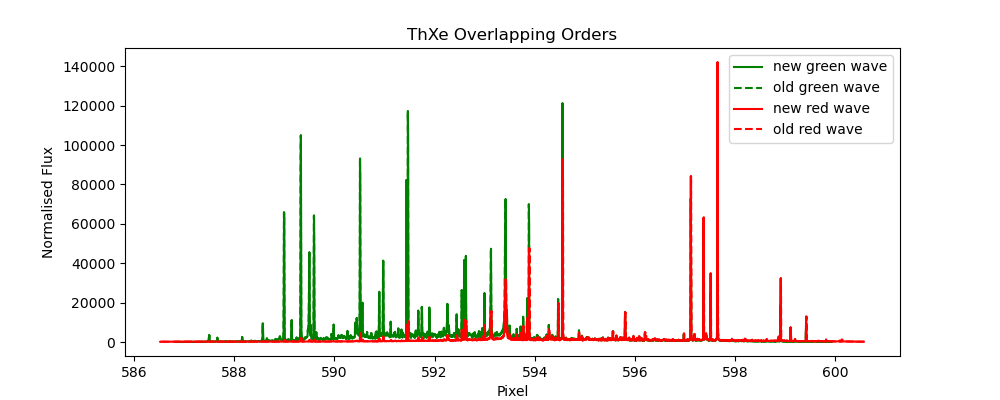

In [58]:
green_order = 0
red_order = -2
plt.figure(figsize=(10, 4))
plt.plot(new_green_wave[green_order], green_extracted_thxe[green_order], 'g-', label='new green wave')
plt.plot(veloce_reduction_tools.vacuum_to_air(old_green_wave[green_order]), green_extracted_thxe[green_order], 'g--', label='old green wave')
plt.plot(new_red_wave[red_order], red_extracted_thxe[red_order], 'r-', label='new red wave')
plt.plot(veloce_reduction_tools.vacuum_to_air(old_red_wave[red_order]), red_extracted_thxe[red_order], 'r--', label='old red wave')
# plt.axhline(1, color='k', ls='--', label='Normalised Flux = 1')
plt.xlabel('Pixel')
plt.ylabel('Normalised Flux')
plt.title('ThXe Overlapping Orders')
plt.legend()
plt.show()

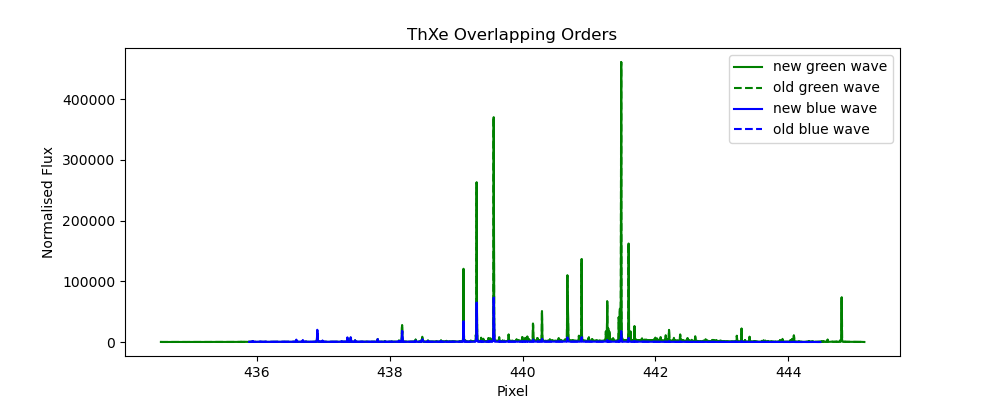

In [ ]:
blue_order = 0
green_order = -2
plt.figure(figsize=(10, 4))
plt.plot(new_green_wave[green_order], green_extracted_thxe[green_order], 'g-', label='new green wave')
plt.plot(veloce_reduction_tools.vacuum_to_air(old_green_wave[green_order]), green_extracted_thxe[green_order], 'g--', label='old green wave')
# plt.plot(new_blue_wave[blue_order], blue_extracted_thxe[blue_order], 'b-', label='new blue wave')
plt.plot(veloce_reduction_tools.vacuum_to_air(old_blue_wave[blue_order]), blue_extracted_thxe[blue_order], 'b--', label='old blue wave')
# plt.axhline(1, color='k', ls='--', label='Normalised Flux = 1')
plt.xlabel('Pixel')
plt.ylabel('Normalised Flux')
plt.title('ThXe Overlapping Orders')
plt.legend()
plt.show()

In [60]:
obs_list['science']

{'240410': []}

In [66]:
# load science obs
# night = '230826'
arm = 'red'
# night = '240410'
# filename = '10apr30130.fits'
filename = '10apr30105.fits'
ccd = f'ccd_3'
amp_mode = 2
obs_filename =  os.path.join(veloce_paths.input_dir, date, ccd, filename)
with fits.open(obs_filename) as hdul:
    image_data = hdul[0].data
    header = hdul[0].header
image_substracted_bias = veloce_reduction_tools.remove_overscan_bias(image_data, header, arm, amp_mode, overscan_range=32)
# Extract obs
red_extracted_obs, _ = veloce_reduction_tools.extract_orders_with_trace(image_substracted_bias, red_traces)

Gain for amplifier 3 not found in header.
Gain for amplifier 4 not found in header.
Gain for half 1: 1.01
Gain for half 2: 1.040502


In [67]:
# load science obs
arm = 'green'
# night = '240410'
# filename = '10apr20130.fits'
filename = '10apr20105.fits'
ccd = f'ccd_2'
amp_mode = 2
obs_filename =  os.path.join(veloce_paths.input_dir, date, ccd, filename)
with fits.open(obs_filename) as hdul:
    image_data = hdul[0].data
    header = hdul[0].header
image_substracted_bias = veloce_reduction_tools.remove_overscan_bias(image_data, header, arm, amp_mode, overscan_range=32)
# Extract obs
green_extracted_obs, _ = veloce_reduction_tools.extract_orders_with_trace(image_substracted_bias, green_traces)

Gain for amplifier 3 not found in header.
Gain for amplifier 4 not found in header.
Gain for half 1: 1.01
Gain for half 2: 1.022423


In [ ]:
def normalise_science_order(y, nknots=10, plot=False):
    """
    Normalise the order by fitting a spline.
    """
    median_step = int(len(y) / (nknots*2) + 1)
    # maximum_step = median_step * 2
    maximum_step = median_step / 10
    print(f"Median step: {median_step}, Maximum step: {maximum_step}, N knots: {nknots}")
    x = np.arange(len(y))
    # smoothed = maximum_filter(median_filter(y, size=median_step), size=maximum_step)
    smoothed = median_filter(maximum_filter(y, size=maximum_step), size=median_step)
    # smoothed = median_filter(y, size=median_step)
    x_fit = np.linspace(x.min(), x.max(), nknots)
    y_fit = np.interp(x_fit, x, smoothed)
    spline = make_interp_spline(x_fit, y_fit, k=3)
    baseline = spline(x)
    
    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(x, y, c='gray', label='Original', alpha=0.5)
        plt.plot(x, smoothed, ls='--', c='k', label='Smoothed')
        plt.scatter(x_fit, y_fit, s=10, c='k', label='Selected knots')
        plt.plot(x, baseline, c='r', label='B-spline fit')
        plt.xlabel('Pixel')
        plt.ylabel('Flux')
        plt.xlim(0, len(y))
        plt.ylim(0, np.max(smoothed) * 1.05)
        plt.legend()
        plt.title('Normalisation of science Order')
        plt.show()

    return y/baseline

Median step: 55, Maximum step: 5.5, N knots: 35


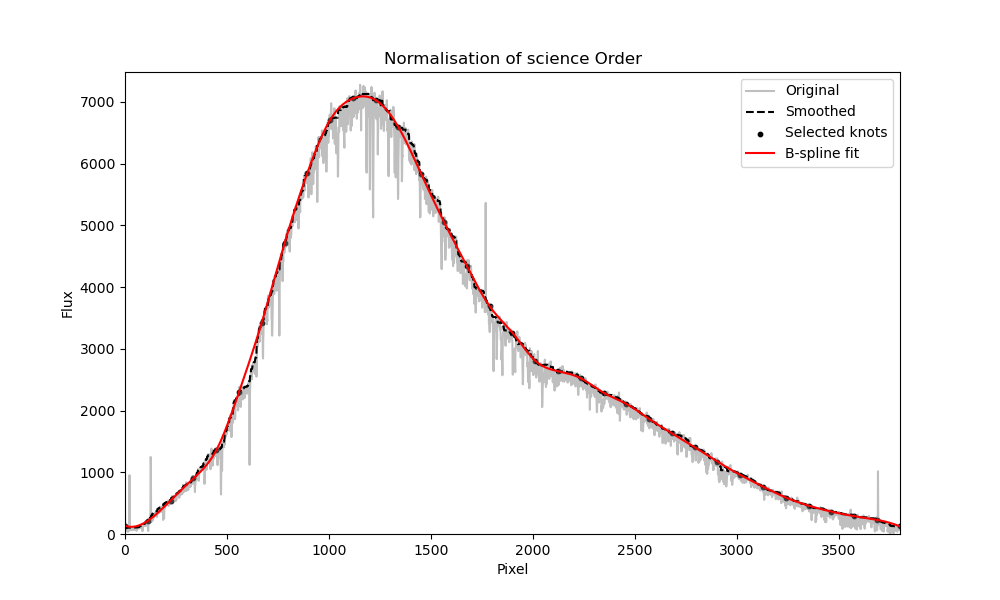

Median step: 52, Maximum step: 5.2, N knots: 40


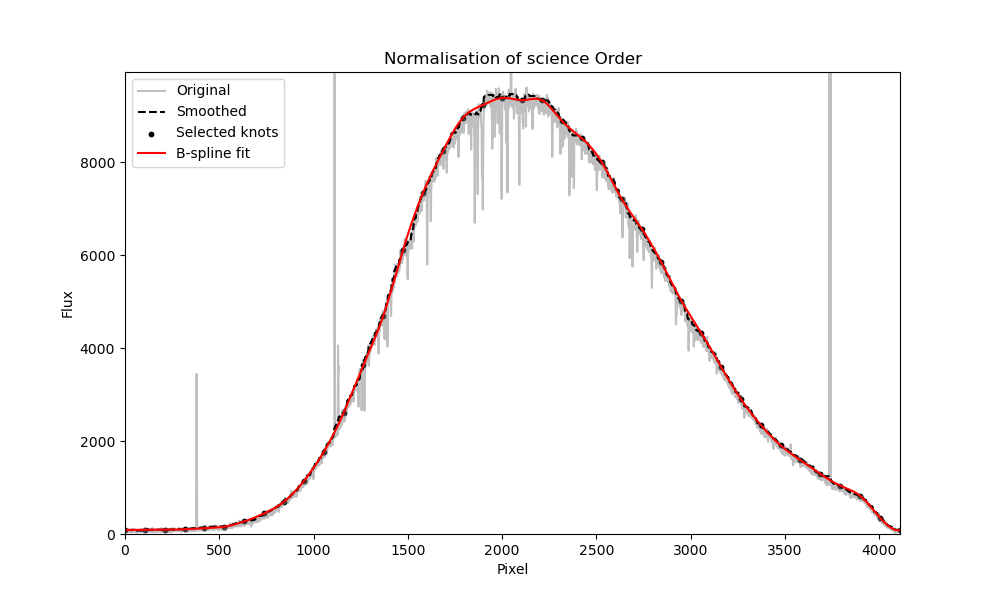

In [69]:
normalised_green_order = normalise_science_order(green_extracted_obs[0], nknots=35, plot=True)
normalised_red_order = normalise_science_order(red_extracted_obs[-2], nknots=40, plot=True)

Median step: 55, Maximum step: 5.5, N knots: 35
Median step: 55, Maximum step: 5.5, N knots: 35
Median step: 52, Maximum step: 5.2, N knots: 40
Median step: 52, Maximum step: 5.2, N knots: 40


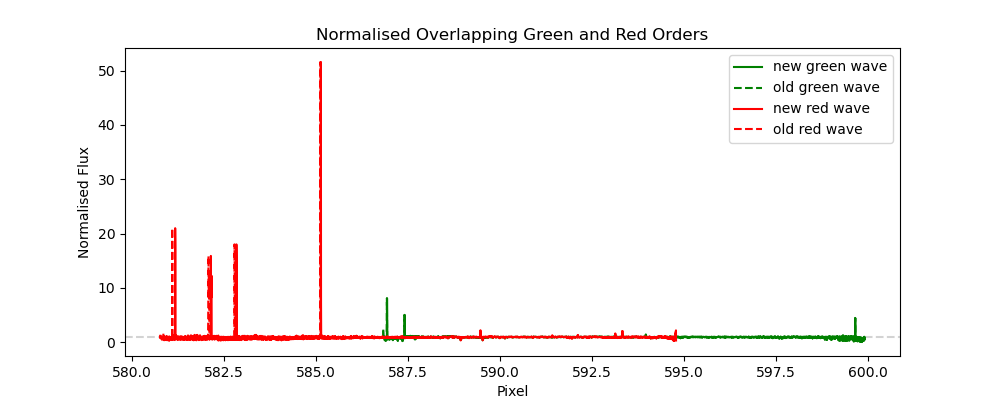

In [70]:
green_order = 0
red_order = -1
plt.figure(figsize=(10, 4))
plt.axhline(1, color='lightgrey', ls='--')

plt.plot(
    new_green_wave[green_order],
    normalise_science_order(green_extracted_obs[green_order], nknots=35, plot=False),
    'g-', label='new green wave')
plt.plot(
    veloce_reduction_tools.vacuum_to_air(old_green_wave[green_order]),
    normalise_science_order(green_extracted_obs[green_order], nknots=35, plot=False),
    'g--', label='old green wave')
plt.plot(new_red_wave[red_order],
    normalise_science_order(red_extracted_obs[red_order], nknots=40, plot=False),
    'r-', label='new red wave')
plt.plot(veloce_reduction_tools.vacuum_to_air(old_red_wave[red_order]),
        normalise_science_order(red_extracted_obs[red_order], nknots=40, plot=False),
        'r--', label='old red wave')

plt.xlabel('Pixel')
plt.ylabel('Normalised Flux')
plt.title('Normalised Overlapping Green and Red Orders')
plt.legend()
plt.show()

In [54]:
%matplotlib widget

Order 123 with 27 lines used to fit the solution.
For reference it has 25 lines in the linelist from Veloce Manual.


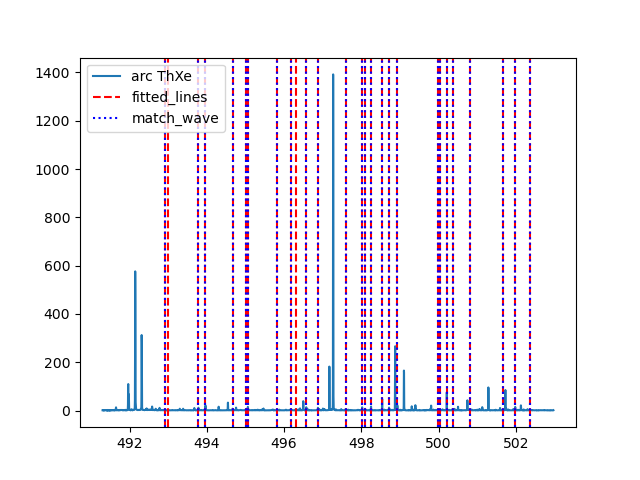

In [129]:
plt.close('all')
order = 20
absolute_order = ORDER[order]
if arm == 'red':
    # not normalising as very bright oversaturated lines mess with my normalisation
    # plt.plot(veloce_reduction_tools.vacuum_to_air(wave[order]), extracted_ThXe[order], label='Data')
    plt.plot(new_wave[order], veloce_wavecalib.normalise_thxe_order(extracted_ThXe[order], nknots=50), label='arc ThXe')
elif arm == 'green':
    plt.plot(new_wave[order], veloce_wavecalib.normalise_thxe_order(extracted_ThXe[order], nknots=50), label='arc ThXe')
elif arm == 'blue':
    plt.plot(new_wave[order], veloce_wavecalib.normalise_thxe_order(extracted_ThXe[order], nknots=50), label='arc ThXe')
else:
    raise ValueError(f"Arm {arm} does not exist, valid arms are ['red', 'green' and 'blue'].")
    

# lines = veloce_wavecalib.get_lines_in_order(veloce_reduction_tools.vacuum_to_air(wave[order]), nist_linelist, intensity_threshold=100, flag=['1'])
# for line in lines:
#     plt.axvline(line['obs_wl_air(nm)'], c='r', ls='--', label="nist_linelist")

# for line in uves_linelist[(uves_linelist['air_wave'] >= wave[20].min()) & (uves_linelist['air_wave'] <= wave[20].max())]:
#     plt.axvline(line['air_wave'], c='orange', ls='--', label="uves_linelist")

# for line in vald_linelist[(vald_linelist['WL_air(nm)'] >= wave[20].min()) & (vald_linelist['WL_air(nm)'] <= wave[20].max())]:
#     plt.axvline(line['WL_air(nm)'], c='orange', ls='--', label="vald_linelist")
for good_fit_wave in wave_positions[(order_positions == absolute_order) & mask]:
    plt.axvline(good_fit_wave, c='r', ls='--', label="fitted_lines")
for match_wave in MATCH_LAM[order]:
    plt.axvline(veloce_reduction_tools.vacuum_to_air(match_wave), c='b', ls=':', label="match_wave")

print(f"Order {absolute_order} with {len(wave_positions[(order_positions == absolute_order) & mask])} lines used to fit the solution.")
print(f"For reference it has {len(MATCH_LAM[order])} lines in the linelist from Veloce Manual.")
# for guess_wave in GUESS_LAM[order]:
#     plt.axvline(veloce_reduction_tools.vacuum_to_air(guess_wave), c='b', ls=':', label="guess_wave")
# Remove duplicate labels in legend
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict()
for h, l in zip(handles, labels):
    if l not in unique:
        unique[l] = h
plt.legend(unique.values(), unique.keys())
# plt.xlim(496.27, 496.34)
plt.show()

In [121]:
wave_positions[(order_positions == absolute_order) & mask]

array([500.20972, 501.9806 , 501.9806 , 500.20972, 498.93082, 498.0186 ,
       496.87555, 498.71466, 501.65353, 500.35986, 498.2487 , 500.20972,
       500.35986, 498.93082, 498.71466, 498.2487 , 498.5372 , 498.0186 ,
       496.87555, 496.5732 , 501.65353, 501.9806 , 496.17264, 495.06262,
       502.37085, 493.96414, 493.78293, 492.90857, 494.66626, 495.02512,
       495.80972, 497.59488, 498.095  , 499.99402, 500.02466, 500.81897,
       496.5732 , 496.87555, 493.96414, 493.78293, 495.06262, 495.02512,
       492.90857, 496.31885, 496.17264, 495.80972, 494.66626, 498.71466,
       498.2487 , 497.59488, 498.0186 , 498.095  , 493.78293, 493.96414,
       494.66626, 492.99863, 492.90857], dtype=float32)

#### Grid search for best surface fitting

In [155]:
# !pip install -U pandas

##### search functions

In [55]:
def grid_search_surface_fit(pixel_positions, order_positions, wave_positions, full_pixels, 
                           degree_range=None, sigma_clip_range=None, n_lim=5, robust=True,
                           metric='std_velocity', verbose=True):
    """
    Perform grid search to find optimal degree and sigma_clip parameters for surface fitting.
    
    Parameters:
    -----------
    pixel_positions, order_positions, wave_positions : array-like
        Input data for fitting
    full_pixels : array-like
        Pixel grid for prediction
    degree_range : list or range, default [3, 4, 5, 6, 7, 8]
        Range of polynomial degrees to test
    sigma_clip_range : list or range, default [1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
        Range of sigma clipping values to test
    n_limit : int, default 5
        Minimum points per order
    metric : str, default 'std_velocity'
        Optimization metric ('std_velocity', 'n_points', 'rms_residuals')
    verbose : bool, default True
        Print progress information
        
    Returns:
    --------
    dict with best parameters, results grid, and best model
    """
    
    if degree_range is None:
        degree_range = [3, 4, 5, 6, 7, 8]
    if sigma_clip_range is None:
        sigma_clip_range = [1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0]
    
    results = []
    best_score = float('inf')
    best_params = None
    best_model = None
    best_results = None
    
    total_iterations = len(degree_range) * len(sigma_clip_range)
    iteration = 0
    
    if verbose:
        print(f"Starting grid search with {total_iterations} parameter combinations...")
        print(f"Degrees: {degree_range}")
        print(f"Sigma clips: {sigma_clip_range}")
        print("-" * 80)
    
    for degree in degree_range:
        n_limit = max(n_lim, degree + 2)  # Ensure n_limit is at least degree + 2
        # n_limit = n_lim
        if verbose: print(f"Testing degree {degree} with n_limit={n_limit}")
        for sigma_clip in sigma_clip_range:
            iteration += 1
            
            try:
                # Fit surface with current parameters
                Z, residuals, mask, model, converged = veloce_wavecalib.fit_surface_sklearn(
                    pixel_positions, order_positions, wave_positions, full_pixels,
                    degree=degree, sigma_clip=sigma_clip, n_limit=n_limit, robust=robust
                )
                
                # Calculate metrics
                n_points_used = np.sum(mask)
                n_total_points = len(mask)
                fraction_used = n_points_used / n_total_points
                
                # Velocity precision (standard error of mean)
                std_velocity = np.std(residuals[mask]/order_positions[mask]/wave_positions[mask] * c) / np.sqrt(n_points_used)
                
                # RMS residuals in velocity units
                rms_velocity = np.sqrt(np.mean((residuals[mask]/order_positions[mask]/wave_positions[mask] * c)**2))
                
                # Points per order
                unique_orders = np.unique(order_positions)
                points_per_order = []
                for order in unique_orders:
                    in_order = order_positions == order
                    points_per_order.append(np.sum(in_order * mask))
                min_points_per_order = np.min(points_per_order)
                avg_points_per_order = np.mean(points_per_order)
                
                # Store results
                result = {
                    'degree': degree,
                    'sigma_clip': sigma_clip,
                    'n_points_used': n_points_used,
                    'n_total_points': n_total_points,
                    'fraction_used': fraction_used,
                    'std_velocity': std_velocity,
                    'rms_velocity': rms_velocity,
                    'complex': rms_velocity * (1 - fraction_used),
                    'min_points_per_order': min_points_per_order,
                    'avg_points_per_order': avg_points_per_order,
                    'converged': converged,
                    'Z': Z,
                    'residuals': residuals,
                    'mask': mask,
                    'model': model
                }
                
                # Determine score based on metric
                if metric == 'std_velocity':
                    score = std_velocity
                elif metric == 'rms_velocity':
                    score = rms_velocity
                elif metric == 'n_points':
                    score = -n_points_used  # Negative because we want to maximize
                elif metric == 'complex':
                    score = rms_velocity * (1-fraction_used)
                else:
                    raise ValueError(f"Unknown metric: {metric}")
                
                # Check if this is the best so far
                if score < best_score and min_points_per_order >= n_limit:
                    best_score = score
                    best_params = {'degree': degree, 'sigma_clip': sigma_clip, 'n_limit': n_limit}
                    best_model = model
                    best_results = result.copy()
                
                if verbose:
                    print(f"[{iteration:2d}/{total_iterations}] deg={degree}, σ={sigma_clip:.1f} → "
                          f"std_vel={std_velocity:.3f} m/s, points={n_points_used}/{n_total_points} "
                          f"({fraction_used:.1%}), min_per_order={min_points_per_order}")
                
            except Exception as e:
                result = {
                    'degree': degree,
                    'sigma_clip': sigma_clip,
                    'error': str(e),
                    'converged': False,
                    'std_velocity': np.inf,
                    'rms_velocity': np.inf,
                    'complex': np.inf,
                    'n_points_used': 0,
                    'fraction_used': 0.0,
                    'min_points_per_order': 0,
                    'avg_points_per_order': 0,
                }
                
                if verbose:
                    print(f"[{iteration:2d}/{total_iterations}] deg={degree}, σ={sigma_clip:.1f} → "
                          f"FAILED: {str(e)[:50]}...")
            
            results.append(result)
    
    if verbose:
        print("-" * 80)
        print(f"Best parameters: {best_params}")
        print(f"Best {metric}: {best_score:.3f}")
        if best_results:
            print(f"Points used: {best_results['n_points_used']}/{best_results['n_total_points']} "
                  f"({best_results['fraction_used']:.1%})")
            print(f"Min points per order: {best_results['min_points_per_order']}")
    
    return {
        'best_params': best_params,
        'best_score': best_score,
        'best_model': best_model,
        'best_results': best_results,
        'all_results': results,
        'degree_range': degree_range,
        'sigma_clip_range': sigma_clip_range
    }

In [ ]:
# import pandas as pd - not part of requirements for the package

# def summary_table(grid_results, top_n=5):
#     """
#     Print a summary table of the best results.
#     """
    
#     # Filter successful results
#     successful_results = [r for r in grid_results['all_results'] if r['converged']]
    
#     # Sort by std_velocity
#     successful_results.sort(key=lambda x: x['std_velocity'])
    
#     # Create DataFrame for top results
#     top_results = successful_results[:top_n]
    
#     df = pd.DataFrame([{
#         'Degree': r['degree'],
#         'Sigma Clip': r['sigma_clip'],
#         'Std Velocity [m/s]': f"{r['std_velocity']:.3f}",
#         'RMS Velocity [m/s]': f"{r['rms_velocity']:.3f}",
#         'Points Used': f"{r['n_points_used']}/{r['n_total_points']}",
#         'Fraction Used': f"{r['fraction_used']:.1%}",
#         'Min Points/Order': r['min_points_per_order']
#     } for r in top_results])
    
#     print(f"\nTop {top_n} Parameter Combinations:")
#     print("=" * 80)
#     print(df.to_string(index=False))
    
#     return df

In [57]:
def plot_grid_search_results(grid_results, metric='std_velocity', best_params=None, 
                           outlier_percentile=95, use_scale='Default', 
                           cmap='RdYlBu_r', text_color='auto', minimize=False):
    """
    Plot grid search results as a heatmap with improved scaling and visibility.
    
    Parameters:
    -----------
    outlier_percentile : float, default 95
        Percentile for outlier clipping (e.g., 95 means clip top 5% of values)
    use_robust_scale : bool, default True
        Use robust scaling (median ± 2*MAD) instead of min-max
    cmap : str, default 'RdYlBu_r'
        Colormap name. Good options: 'RdYlBu_r', 'viridis', 'plasma', 'coolwarm'
    text_color : str or 'auto', default 'auto'
        Text color for annotations. 'auto' chooses based on background
    """
    # Extract data for plotting
    degrees = grid_results['degree_range']
    sigma_clips = grid_results['sigma_clip_range']
    results = grid_results['all_results']
    
    # Create grid for results
    score_grid = np.full((len(degrees), len(sigma_clips)), np.nan)
    
    for result in results:
        if result['converged']:
            i = degrees.index(result['degree'])
            j = sigma_clips.index(result['sigma_clip'])
            score_grid[i, j] = result[metric]
    
    # Handle outliers and scaling
    valid_scores = score_grid[~np.isnan(score_grid)]
    
    if use_scale == 'Default':
        mean_score = np.mean(valid_scores)
        std = np.std(valid_scores)
        vmin = 0
        # vmin = np.min(valid_scores)
        vmax = np.max(valid_scores)
        vmax = mean_score + np.sqrt(2) * std
        if vmax > np.max(valid_scores):
            vmax = np.max(valid_scores)
    elif use_scale == 'Robust':
        # Robust scaling using median and MAD
        median_score = np.median(valid_scores)
        mad = np.median(np.abs(valid_scores - median_score))        
        vmin = median_score - 2 * mad
        if vmin < 0:
            vmin = 0
        vmax = median_score + 2 * mad

    elif use_scale == 'Percentile':
        # Percentile-based clipping
        vmin = np.percentile(valid_scores, 100 - outlier_percentile)
        vmax = np.percentile(valid_scores, outlier_percentile)
    elif 'MinMax':        # Default min-max scaling
        vmin = np.min(valid_scores)
        vmax = np.max(valid_scores)
    else:
        raise ValueError(f"Unknown scaling method: {use_scale}")
    # Ensure reasonable bounds
    # vmin = np.min(valid_scores)
    # vmax = np.max(valid_scores)
    
    # Create normalization - use TwoSlopeNorm for better contrast if appropriate
    if minimize:
        # For velocity metrics, we want lower values to be better (darker/cooler colors)
        norm = plt.Normalize(vmin=vmin, vmax=vmax)
    else:
        norm = plt.Normalize(vmin=vmax, vmax=vmin)
        if '_r' in cmap:
            cmap = cmap.replace('_r', '')
        else:
            cmap += '_r'
    
    # Plot heatmap
    fig, ax = plt.subplots(figsize=(12, 8))
    im = ax.imshow(score_grid, cmap=cmap, aspect='auto', norm=norm)
    
    # Set ticks and labels
    ax.set_xticks(range(len(sigma_clips)))
    ax.set_xticklabels([f'{s:.1f}' for s in sigma_clips])
    ax.set_yticks(range(len(degrees)))
    ax.set_yticklabels(degrees)
    
    ax.set_xlabel('Sigma Clip')
    ax.set_ylabel('Polynomial Degree')
    ax.set_title(f'Grid Search Results - {metric.replace("_", " ").title()}')
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, shrink=0.8)
    if 'velocity' in metric:
        cbar.set_label('Velocity Precision [m/s]')
    else:
        cbar.set_label(metric.replace('_', ' ').title())
    
    # Add text annotations with smart color selection
    for i in range(len(degrees)):
        for j in range(len(sigma_clips)):
            if not np.isnan(score_grid[i, j]):
                value = score_grid[i, j]
                
                # Smart text color selection
                if text_color == 'auto':
                    # Get normalized value for color decision
                    norm_value = (value - vmin) / (vmax - vmin) if vmax > vmin else 0.5
                    text_col = 'white' if norm_value < 0.5 else 'black'
                else:
                    text_col = text_color
                
                # Format text based on value magnitude
                if abs(value) >= 100:
                    text = f'{value:.0f}'
                elif abs(value) >= 10:
                    text = f'{value:.1f}'
                else:
                    text = f'{value:.2f}'
                
                ax.text(j, i, text, ha="center", va="center", 
                       color=text_col, fontsize=9, weight='bold')
    
    # Mark best result with a prominent border
    if best_params is not None:
        best_i = degrees.index(best_params['degree'])
        best_j = sigma_clips.index(best_params['sigma_clip'])
        # Add multiple borders for visibility
        for width, color in [(4, 'white'), (2, 'red')]:
            ax.add_patch(plt.Rectangle((best_j-0.5, best_i-0.5), 1, 1, 
                                      fill=False, edgecolor=color, linewidth=width))
    
    # Add statistics text box
    stats_text = f'Valid results: {len(valid_scores)}/{len(degrees)*len(sigma_clips)}\n'
    stats_text += f'Range: {np.min(valid_scores):.3f} - {np.max(valid_scores):.3f}\n'
    stats_text += f'Display range: {vmin:.3f} - {vmax:.3f}'
    
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', 
            facecolor='white', alpha=0.8), fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Print outlier information
    n_outliers = np.sum((valid_scores < vmin) | (valid_scores > vmax))
    if n_outliers > 0:
        print(f"Note: {n_outliers} outlier values clipped for better visualization")
        print(f"Clipped range: {vmin:.3f} to {vmax:.3f}")

In [58]:
def is_dominated(result1, result2, objectives=['std_velocity', 'n_points_used'], minimize=[True, False]):
    """
    Check if result1 is dominated by result2 in multi-objective sense.
    """
    better_in_all = True
    better_in_at_least_one = False
    
    for obj, minimize_obj in zip(objectives, minimize):
        val1 = result1[obj]
        val2 = result2[obj]
        
        if minimize_obj:
            # result2 dominates result1 if result2 is better (smaller) in this objective
            if val2 < val1:  # result2 is better
                better_in_at_least_one = True
            elif val2 > val1:  # result2 is worse
                better_in_all = False
        else:  # maximize
            # result2 dominates result1 if result2 is better (larger) in this objective
            if val2 > val1:  # result2 is better
                better_in_at_least_one = True
            elif val2 < val1:  # result2 is worse
                better_in_all = False
    
    return better_in_all and better_in_at_least_one

def find_pareto_frontier(results, objectives=['std_velocity', 'n_points_used'], minimize=[True, False]):
    """
    Find Pareto-optimal solutions.
    """
    # Filter successful results
    valid_results = [r for r in results if r.get('converged', False)]
    
    pareto_results = []
    
    for result in valid_results:
        is_pareto = True
        for other_result in valid_results:
            if other_result != result and is_dominated(result, other_result, objectives, minimize):
                is_pareto = False
                break
        
        if is_pareto:
            pareto_results.append(result)
    
    return pareto_results

def grid_search_pareto(pixel_positions, order_positions, wave_positions, full_pixels,
                      degree_range=None, sigma_clip_range=None, n_lim=5, robust=True,
                      objectives=['std_velocity', 'n_points_used'], minimize=[True, False],
                      verbose=True):
    """
    Grid search with Pareto frontier analysis.
    """
    if degree_range is None:
        degree_range = [3, 4, 5, 6, 7, 8]
    if sigma_clip_range is None:
        sigma_clip_range = [1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0]
    # Run standard grid search first
    grid_results = grid_search_surface_fit(
        pixel_positions, order_positions, wave_positions, full_pixels,
        degree_range=degree_range, sigma_clip_range=sigma_clip_range,
        n_lim=n_lim, robust=robust, metric='std_velocity', verbose=verbose
    )
    # ... (similar loop as before, but store all results)
    
    # Find Pareto frontier
    pareto_results = find_pareto_frontier(grid_results['all_results'], objectives, minimize)
    
    if verbose:
        print(f"Found {len(pareto_results)} Pareto-optimal solutions:")
        for i, result in enumerate(pareto_results):
            print(f"  {i+1}. deg={result['degree']}, σ={result['sigma_clip']:.1f}")
            for obj in objectives:
                print(f"     {obj}: {result[obj]:.3f}")
    
    return {
        'pareto_results': pareto_results,
        'all_results': grid_results['all_results'],
        'grid_results': grid_results,
        'objectives': objectives,
        'minimize': minimize
    }

In [59]:
### maybe instead of scaling n_points used by min and max in results I can do points rejected and have 0 - n_points_total (scaled then to 1)?
def find_knee_point(pareto_results, objectives=['std_velocity', 'n_points_used']):
    """
    Find the knee point (maximum curvature) in the Pareto frontier.
    """
    # Extract and normalize objectives
    points = np.array([[r[obj] for obj in objectives] for r in pareto_results])
    
    # Normalize to [0,1]
    normalized_points = (points - points.min(axis=0)) / (points.max(axis=0) - points.min(axis=0))
    
    # For minimization problems, we want the point closest to the ideal point (0,0)
    # But since we're maximizing n_points_used, flip that dimension
    normalized_points[:, 1] = 1 - normalized_points[:, 1]  # Flip n_points dimension
    
    # Find point closest to ideal (0,0)
    distances_to_ideal = np.sqrt(np.sum(normalized_points**2, axis=1))
    knee_idx = np.argmin(distances_to_ideal)
    
    return pareto_results[knee_idx], knee_idx

In [60]:
def plot_pareto_frontier(results, objectives=['std_velocity', 'n_points_used'], minimize=[True, False], vel_minmax=(0, None), n_pts_minmax=(None, None), xy_text=(10, 0), knee_solution=None):
    """
    Plot the Pareto frontier in 2D objective space, marking the knee point.
    """
    all_results = results['all_results']
    pareto_results = results['pareto_results']
    valid_results = [r for r in all_results if r.get('converged', False)]

    if len(objectives) != 2:
        print("Can only plot 2D Pareto frontier")
        return

    # Extract objective values
    all_x = [r[objectives[0]] for r in valid_results]
    all_y = [r[objectives[1]] for r in valid_results]
    pareto_x = [r[objectives[0]] for r in pareto_results]
    pareto_y = [r[objectives[1]] for r in pareto_results]

    plt.figure(figsize=(10, 6))
    plt.scatter(all_x, all_y, c='lightblue', alpha=0.6, label='All solutions')
    plt.scatter(pareto_x, pareto_y, c='red', alpha=0.8, label='Pareto optimal')

    # Mark and label the knee point
    if knee_solution is not None:
        knee_x = knee_solution[objectives[0]]
        knee_y = knee_solution[objectives[1]]
        plt.axvline(knee_x, color='k', linestyle='--', alpha=0.7)
        plt.axhline(knee_y, color='k', linestyle='--', alpha=0.7)
        plt.scatter([knee_x], [knee_y], c='gold', s=100, edgecolor='black', zorder=10, label='Knee point')
        plt.annotate(f"Knee: deg={knee_solution['degree']}, σ={knee_solution['sigma_clip']:.1f}",
                     (knee_x, knee_y), xytext=xy_text, textcoords='offset points', fontsize=10, color='black', weight='bold')

    plt.xlabel(f"{objectives[0]} ({'minimize' if minimize[0] else 'maximize'})")
    plt.ylabel(f"{objectives[1]} ({'minimize' if minimize[1] else 'maximize'})")
    plt.title('Pareto Frontier Analysis')
    plt.xlim(vel_minmax)
    plt.ylim(n_pts_minmax)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


In [61]:
%matplotlib inline

##### Grid search and Perato Frontier

Starting grid search with 30 parameter combinations...
Degrees: [4, 5, 6, 7, 8]
Sigma clips: [1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
--------------------------------------------------------------------------------
Testing degree 4 with n_limit=10
Converged.
Std of residuals dropped from 0.850 to 0.021 after 44 iterations.
RANSAC inliers: 247 -> constrained: 434 vs iterative: 443
[ 1/30] deg=4, σ=1.0 → std_vel=10.563 m/s, points=434/2014 (21.5%), min_per_order=10
Converged.
Std of residuals dropped from 0.850 to 0.026 after 31 iterations.
RANSAC inliers: 345 -> constrained: 455 vs iterative: 541
[ 2/30] deg=4, σ=1.2 → std_vel=14.058 m/s, points=455/2014 (22.6%), min_per_order=10
Converged.
Std of residuals dropped from 0.850 to 0.027 after 34 iterations.
RANSAC inliers: 427 -> constrained: 514 vs iterative: 588
[ 3/30] deg=4, σ=1.4 → std_vel=12.085 m/s, points=514/2014 (25.5%), min_per_order=10
Converged.
Std of residuals dropped from 0.850 to 0.030 after 35 iterations.
RANSAC inliers: 524 -> co

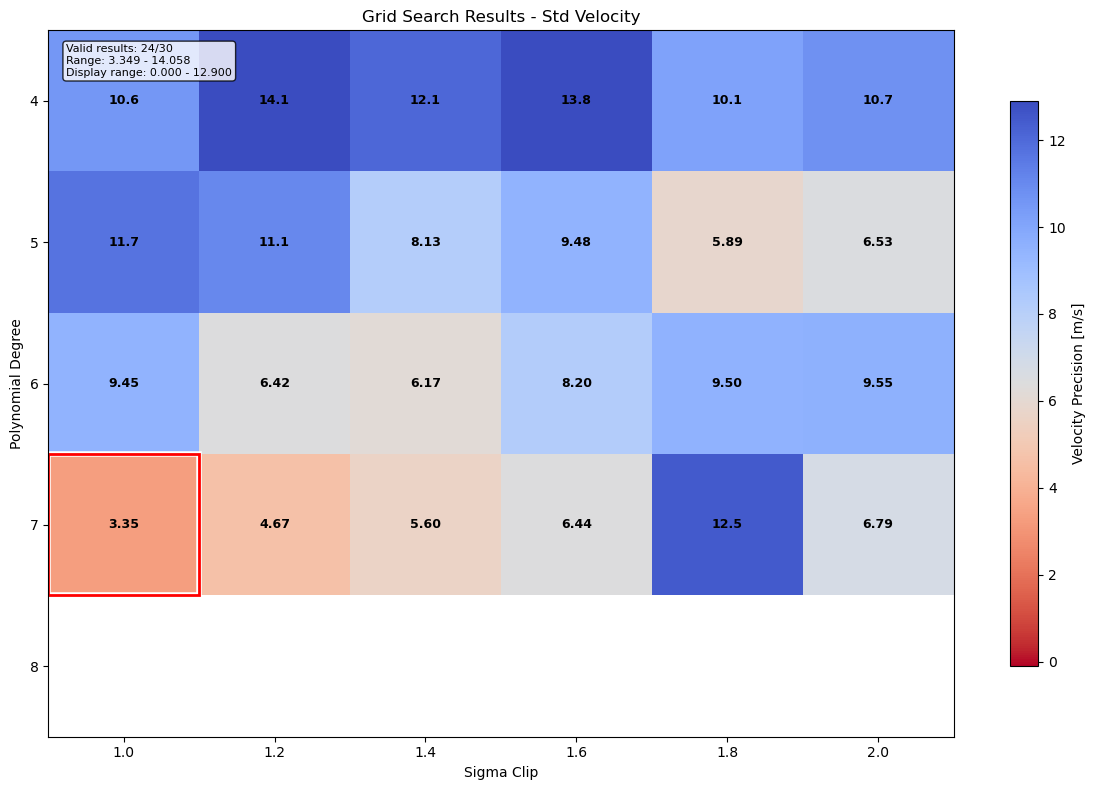

Note: 2 outlier values clipped for better visualization
Clipped range: 0.000 to 12.900

Top 10 Parameter Combinations:
 Degree  Sigma Clip Std Velocity [m/s] RMS Velocity [m/s] Points Used Fraction Used  Min Points/Order
      7         1.0              3.349             66.971    400/2014         19.9%                10
      7         1.2              4.671             94.005    405/2014         20.1%                10
      7         1.4              5.597            112.782    406/2014         20.2%                10
      5         1.8              5.889            150.134    650/2014         32.3%                10
      6         1.4              6.171            130.463    447/2014         22.2%                10
      6         1.2              6.424            131.342    418/2014         20.8%                10
      7         1.6              6.439            136.126    447/2014         22.2%                10
      5         2.0              6.530            189.488    842/

In [ ]:
# Run grid search
grid_results = grid_search_surface_fit(
    pixel_positions, order_positions, wave_positions, full_pixels,
    degree_range=[4, 5, 6, 7, 8],
    sigma_clip_range=[1.0, 1.2, 1.4, 1.6, 1.8, 2.0],
    n_lim=10,
    robust=True,
    metric='std_velocity',
    verbose=True
)

plot_grid_search_results(grid_results, metric='std_velocity', best_params=grid_results['best_params'], 
                        cmap='coolwarm', text_color='black')


# Show summary table
# summary_table(grid_results, top_n=10)

# Use best parameters
best_params = grid_results['best_params']
print(f"\nOptimal parameters: degree={best_params['degree']}, sigma_clip={best_params['sigma_clip']}")

# Refit with best parameters
# Z_opt, residuals_opt, mask_opt, model_opt, converged = fit_surface_sklearn(
#     pixel_positions, order_positions, wave_positions, full_pixels,
#     degree=best_params['degree'], 
#     sigma_clip=best_params['sigma_clip'], 
#     n_limit=best_params['degree']+2,  # Ensure n_limit is at least degree + 2
#     robust=False
# )

In [63]:
grid_results['best_params']

{'degree': 7, 'sigma_clip': 1.0, 'n_limit': 10}

In [64]:
# Pareto frontier approach
degree_range = [4, 5, 6, 7]
sigma_clip_range = [1.4, 1.6, 1.8, 2.0, 2.1, 2.2, 2.3, 2.4, 2.6, 2.8, 3.0]
objectives = ['std_velocity', 'n_points_used']
minimize = [True, False]  # minimize std_velocity, maximize n_points_used
pareto_results = grid_search_pareto(
    pixel_positions, order_positions, wave_positions, full_pixels,
    degree_range=degree_range,
    sigma_clip_range=sigma_clip_range,
    n_lim=0, robust=False,
    objectives=objectives,
    minimize=minimize
)

Starting grid search with 44 parameter combinations...
Degrees: [4, 5, 6, 7]
Sigma clips: [1.4, 1.6, 1.8, 2.0, 2.1, 2.2, 2.3, 2.4, 2.6, 2.8, 3.0]
--------------------------------------------------------------------------------
Testing degree 4 with n_limit=6
Converged.
Std of residuals dropped from 0.850 to 0.016 after 24 iterations.
[ 1/44] deg=4, σ=1.4 → std_vel=3.904 m/s, points=425/2014 (21.1%), min_per_order=6
Converged.
Std of residuals dropped from 0.850 to 0.019 after 51 iterations.
[ 2/44] deg=4, σ=1.6 → std_vel=4.144 m/s, points=530/2014 (26.3%), min_per_order=6
Converged.
Std of residuals dropped from 0.850 to 0.033 after 28 iterations.
[ 3/44] deg=4, σ=1.8 → std_vel=5.509 m/s, points=852/2014 (42.3%), min_per_order=6
Converged.
Std of residuals dropped from 0.850 to 0.052 after 14 iterations.
[ 4/44] deg=4, σ=2.0 → std_vel=7.417 m/s, points=1203/2014 (59.7%), min_per_order=6
Converged.
Std of residuals dropped from 0.850 to 0.057 after 19 iterations.
[ 5/44] deg=4, σ=2.1 → 

Knee point solution: deg=7, σ=2.4


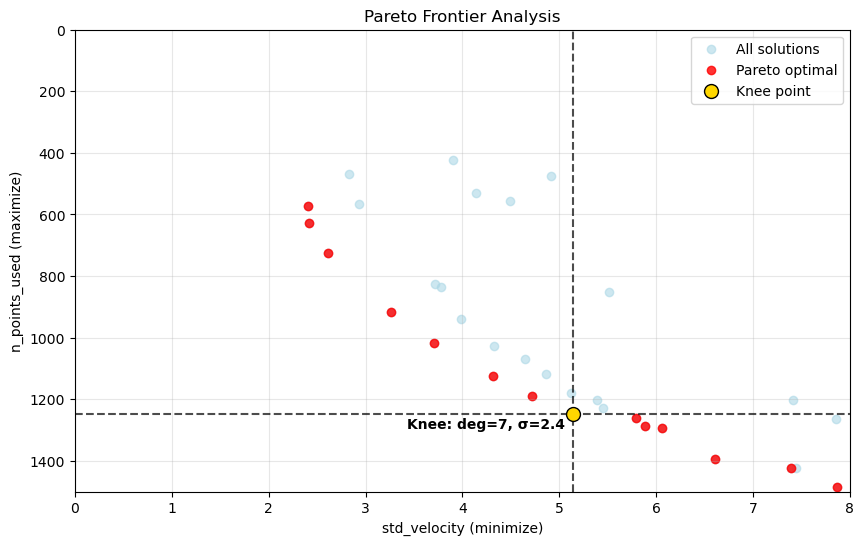

In [65]:
# Plot the results
knee_solution, knee_idx = find_knee_point(pareto_results['pareto_results'])
print(f"Knee point solution: deg={knee_solution['degree']}, σ={knee_solution['sigma_clip']:.1f}")
plot_pareto_frontier(pareto_results, 
                    objectives=['std_velocity', 'n_points_used'], 
                    minimize=[True, False], n_pts_minmax=(1500, 0), #n_pts_minmax=(len(mask), 0),
                    vel_minmax=(0, 8),
                    xy_text=(-120,-10), 
                    knee_solution=knee_solution)  # Adjust limits as needed

In [ ]:
# def select_best_pareto_solution(pareto_results, weights=None):
#     """
#     Select best Pareto solution using weighted scoring.
    
#     Parameters:
#     -----------
#     pareto_results : list
#         List of Pareto-optimal results
#     weights : dict
#         Weights for each objective, e.g., {'std_velocity': 0.7, 'n_points_used': 0.3}
#     """
#     if weights is None:
#         # Default: prioritize velocity precision over number of points
#         weights = {'std_velocity': 0.8, 'n_points_used': 0.2}
    
#     best_solution = None
#     best_score = 0 #float('inf')
    
#     # Normalize objectives to [0,1] scale
#     all_std_vel = [r['std_velocity'] for r in pareto_results]
#     all_n_points = [r['n_points_used'] for r in pareto_results]
    
#     min_std_vel, max_std_vel = min(all_std_vel), max(all_std_vel)
#     min_n_points, max_n_points = min(all_n_points), max(all_n_points)
    
#     for result in pareto_results:
#         # Normalize std_velocity (lower is better, so invert)
#         norm_std_vel = (max_std_vel - result['std_velocity']) / (max_std_vel - min_std_vel) if max_std_vel != min_std_vel else 0.5
        
#         # Normalize n_points_used (higher is better)
#         norm_n_points = (result['n_points_used'] - min_n_points) / (max_n_points - min_n_points) if max_n_points != min_n_points else 0.5
        
#         # Calculate weighted score
#         score = weights['std_velocity']**2 * norm_std_vel + weights['n_points_used']**2 * norm_n_points
        
#         if score > best_score:  # Higher score is better
#             best_score = score
#             best_solution = result
    
#     return best_solution, best_score

# # Example usage
# best_solution, score = select_best_pareto_solution(
#     pareto_results['pareto_results'], 
#     weights={'std_velocity': 0.8, 'n_points_used': 0.2}  # Prioritize precision
# )
# print(f"Best solution: deg={best_solution['degree']}, σ={best_solution['sigma_clip']:.1f}")
# print(f"Score: {score:.3f}")

Best solution: deg=7, σ=1.6
Score: 0.642


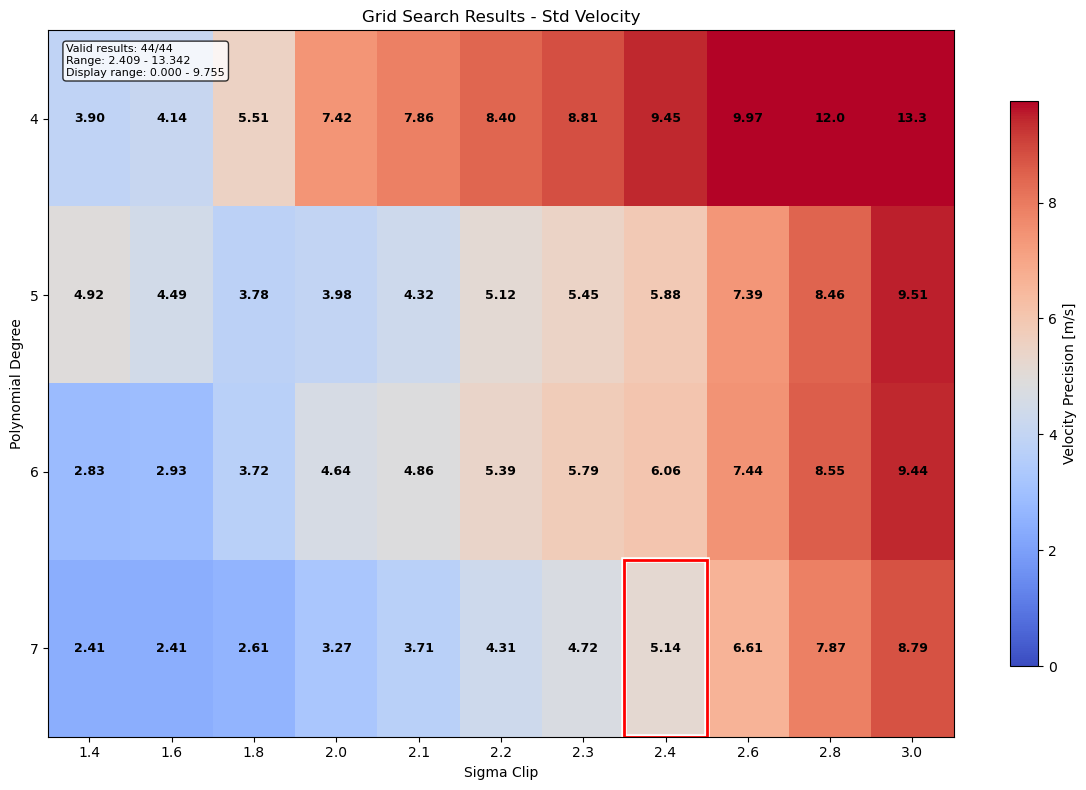

Note: 3 outlier values clipped for better visualization
Clipped range: 0.000 to 9.755


In [66]:
# Custom colormap with manual text color
plot_grid_search_results(pareto_results['grid_results'], metric='std_velocity', best_params=knee_solution,
                        cmap='coolwarm', text_color='black', use_scale='Default', minimize=True)

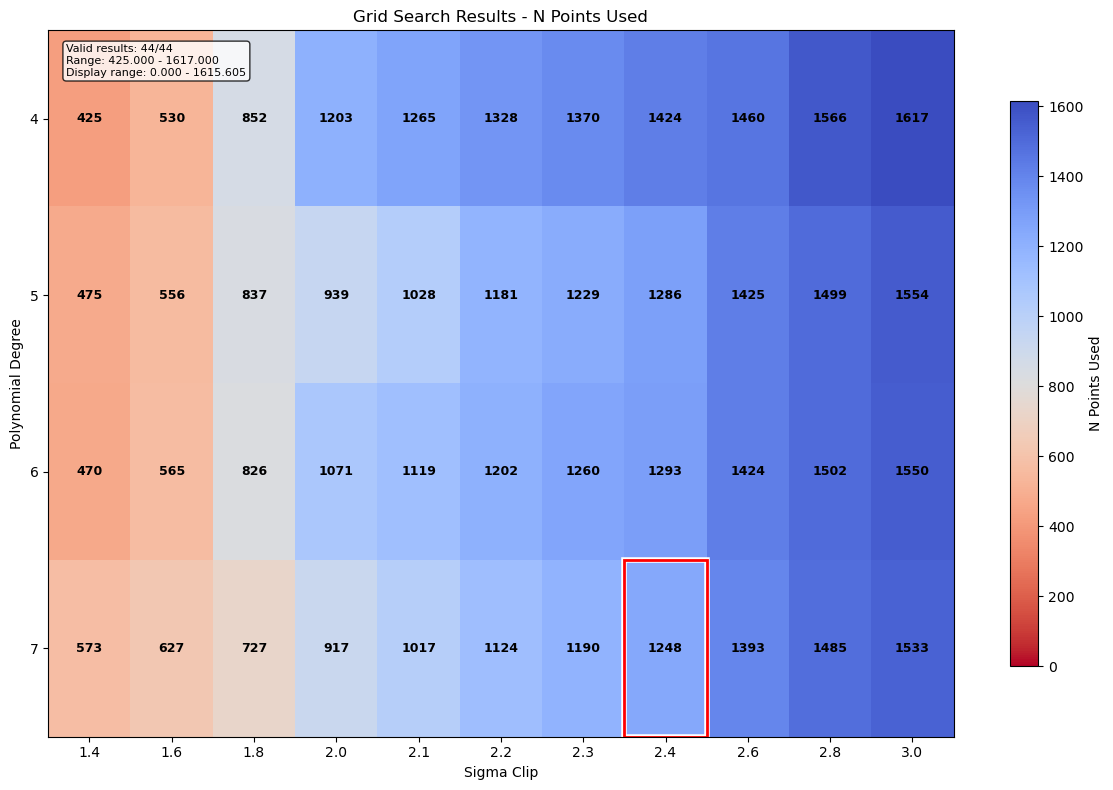

Note: 1 outlier values clipped for better visualization
Clipped range: 0.000 to 1615.605


In [67]:
plot_grid_search_results(pareto_results['grid_results'], metric='n_points_used', best_params=knee_solution,
                        cmap='coolwarm', text_color='black', use_scale='Default', minimize=False)